#### Revised version by filling the nan values using soil properties

In [52]:
#Enter data Version

version = 'v1_1'

# Ipmorting Essential Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import geopandas as gpd

In [53]:

dir_soil_properties=f'/Users/dulminiguruge/Documents/GitHub/syn-yields/2025/aug-31/data/raw/soil_prop_selected_features_filled_v2.csv'
#Changed the version of the dir_climate_agg to v1_1 taken from etl v1.1
dir_climate_agg=f'/Users/dulminiguruge/Documents/GitHub/syn-yields/2025/aug-31/data/processed/climate_aggregated_by_year_and_twn_11_24_float_32_v1_1.csv'
dir_yield=f'/Users/dulminiguruge/Documents/GitHub/syn-yields/2025/aug-31/data/raw/producer_yield_agg_by_township_filtered_final_2011_2024_v1.csv'

# Soil Properties Data  
df_soil_properties=pd.read_csv(dir_soil_properties)
# Climate Data
df_climate_agg=pd.read_csv(dir_climate_agg)

# Yield Data
df_yield=pd.read_csv(dir_yield)

df_climate_soil=pd.merge(
    df_climate_agg, df_soil_properties,
    on='Township',how='left')

df=pd.merge(df_yield,df_climate_soil, on=['Township', 'Year','Crop'], how='inner')

In [54]:
df_yield['Crop'].unique()

array(['Canola', 'Peas', 'Wheat_Spring', 'Lentils_Red', 'Wheat_Durum',
       'Barley', 'Lentils_Green', 'Oats'], dtype=object)

# Filter Methods

##  Correlation Coefficent

In [55]:
df_climate_soil['Crop'].unique()

array(['Barley', 'Canola', 'Lentils_Green', 'Lentils_Red', 'Oats', 'Peas',
       'Wheat_Durum', 'Wheat_Spring'], dtype=object)

In [56]:
df['Crop'].unique()

array(['Canola', 'Peas', 'Wheat_Spring', 'Lentils_Red', 'Wheat_Durum',
       'Barley', 'Lentils_Green', 'Oats'], dtype=object)

In [57]:
df[df['Frost_Seeding']!=0]

,Township,Crop,Year,Yield,Precipitation_Seeding,VPD_Seeding,HBU_Seeding,Frost_Seeding,Precipitation_Flowering,VPD_Flowering,HBU_Flowering,Precipitation_Filling,VPD_Filling,HBU_Filling,TSAND,TCLAY,ORGCARB
0,1-1-E1,Canola,2015,48.67,168.20999,1.369346,0.311188,-4.689880,133.66,1.553696,22.291290,26.460001,1.862087,54.210480,21.207698,41.549242,5.313211
6,1-1-E1,Wheat_Spring,2015,63.20,164.33000,1.357073,0.311188,-4.689880,137.36,1.574352,22.291290,26.640001,1.840341,54.210480,21.207698,41.549242,5.313211
16,1-1-W1,Canola,2021,40.98,54.38000,2.155799,75.442600,-0.398468,29.74,2.175715,68.444275,93.790000,2.030931,75.636170,41.303746,37.524926,5.236278
25,1-1-W1,Wheat_Spring,2021,70.00,51.87000,2.123907,59.660370,-0.398468,32.25,2.226858,84.226500,93.790000,2.036688,75.636170,41.303746,37.524926,5.236278
29,1-1-W2,Canola,2016,39.90,136.35000,1.606574,6.884369,-0.636627,142.29,1.268728,1.537628,88.229996,1.687876,20.724426,36.131277,24.610563,3.000247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41340,96-20-W5,Canola,2016,35.68,92.93000,1.524860,3.437317,-0.848999,77.63,1.352464,0.000000,56.260000,1.557877,0.000000,34.278055,34.193910,4.357281
41344,96-20-W5,Canola,2020,54.00,120.71000,1.015522,0.000000,-7.587738,105.72,1.188826,0.000000,76.970000,1.301826,3.718048,34.278055,34.193910,4.357281
41345,96-20-W5,Canola,2021,60.00,62.26000,1.620388,6.688232,-1.190338,39.07,2.116767,67.614655,48.940000,1.616508,12.607025,34.278055,34.193910,4.357281
41346,96-20-W5,Oats,2016,192.74,74.87000,1.567566,3.437317,-0.848999,95.99,1.333866,0.000000,75.420000,1.525710,0.000000,34.278055,34.193910,4.357281


In [58]:
df.columns

Index(['Township', 'Crop', 'Year', 'Yield', 'Precipitation_Seeding',
       'VPD_Seeding', 'HBU_Seeding', 'Frost_Seeding',
       'Precipitation_Flowering', 'VPD_Flowering', 'HBU_Flowering',
       'Precipitation_Filling', 'VPD_Filling', 'HBU_Filling', 'TSAND', 'TCLAY',
       'ORGCARB'],
      dtype='object')

In [59]:
df['Crop'].unique()

array(['Canola', 'Peas', 'Wheat_Spring', 'Lentils_Red', 'Wheat_Durum',
       'Barley', 'Lentils_Green', 'Oats'], dtype=object)

In [60]:
df.columns

Index(['Township', 'Crop', 'Year', 'Yield', 'Precipitation_Seeding',
       'VPD_Seeding', 'HBU_Seeding', 'Frost_Seeding',
       'Precipitation_Flowering', 'VPD_Flowering', 'HBU_Flowering',
       'Precipitation_Filling', 'VPD_Filling', 'HBU_Filling', 'TSAND', 'TCLAY',
       'ORGCARB'],
      dtype='object')

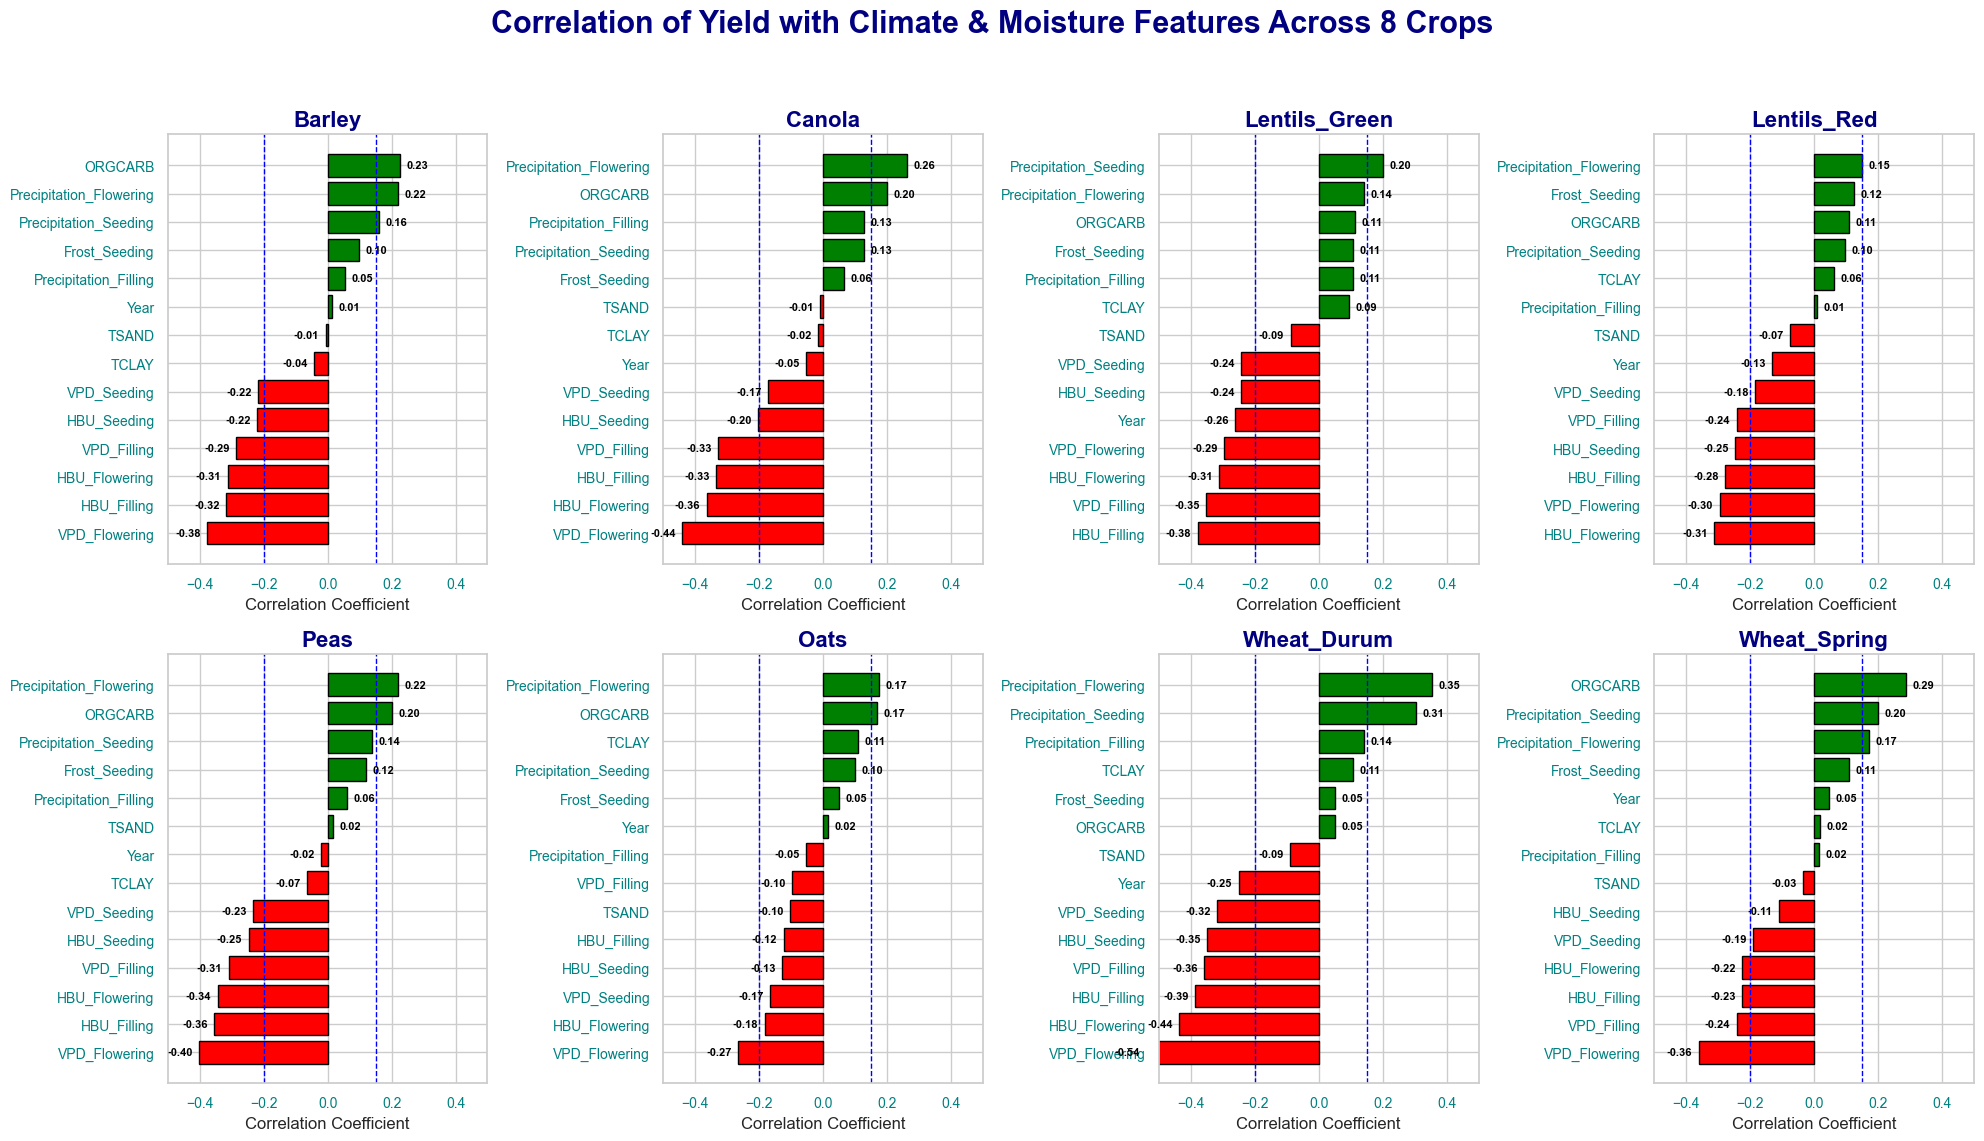

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of 8 crops
list_of_crops = [
    'Barley',
    'Canola',
    'Lentils_Green',
    'Lentils_Red',
    'Peas',
    'Oats',
    'Wheat_Durum',
    'Wheat_Spring'
]

# Create a figure with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
axes = axes.flatten()

for i, crop in enumerate(list_of_crops):
    ax = axes[i]
    
    # Filter the DataFrame for the current crop
    df_crop = df[df['Crop'] == crop]
    
    if df_crop.empty:
        ax.text(0.5, 0.5, f'No data for {crop}', horizontalalignment='center',
                verticalalignment='center', fontsize=16, color='red', transform=ax.transAxes)
        ax.set_title(f'{crop} - No Data Available', fontsize=20, fontweight='bold')
        ax.axis('off')
        continue

    # Drop irrelevant columns; keep Yield and feature columns
    columns_to_drop = ['LLD', 'Crop', 'Township', 'SoilType','PR']
    existing_columns_to_drop = [col for col in columns_to_drop if col in df_crop.columns]
    df_corr = df_crop.drop(columns=existing_columns_to_drop)
    
    # Check if 'Yield' exists
    if 'Yield' not in df_corr.columns:
        ax.text(0.5, 0.5, f'No Yield data for {crop}', horizontalalignment='center',
                verticalalignment='center', fontsize=16, color='red', transform=ax.transAxes)
        ax.set_title(f'{crop} - No Yield Data', fontsize=20, fontweight='bold')
        ax.axis('off')
        continue

    # Compute correlations with Yield and sort them
    corr = df_corr.corr()['Yield'].drop('Yield').sort_values()
    
    if corr.empty:
        ax.text(0.5, 0.5, f'No correlation data for {crop}', horizontalalignment='center',
                verticalalignment='center', fontsize=16, color='red', transform=ax.transAxes)
        ax.set_title(f'{crop} - No Correlation Data', fontsize=20, fontweight='bold')
        ax.axis('off')
        continue

    # Plot horizontal bar chart of correlation coefficients
    y_pos = np.arange(len(corr))
    colors = ['green' if val >= 0 else 'red' for val in corr.values]
    ax.barh(y_pos, corr.values, color=colors, edgecolor='black')
    
    # Set y-axis ticks and labels
    ax.set_yticks(y_pos)
    ax.set_yticklabels(corr.index, fontsize=10)
    
    # Draw vertical reference lines at -0.20 and 0.15
    ax.axvline(x=-0.20, color='blue', linestyle='--', linewidth=1)
    ax.axvline(x=0.15, color='blue', linestyle='--', linewidth=1)
    
    # Annotate each bar with its correlation value
    for j, (val, feat) in enumerate(zip(corr.values, corr.index)):
        if val < 0:
            ha = 'right'
            x_pos = val - 0.02
        else:
            ha = 'left'
            x_pos = val + 0.02
        ax.text(x_pos, j, f'{val:.2f}', va='center', ha=ha, fontsize=8, fontweight='bold', color='black')
    
    ax.set_title(f'{crop}', fontsize=16, fontweight='bold', color='navy')
    ax.set_xlabel('Correlation Coefficient', fontsize=12)
    ax.set_xlim(-0.5, 0.5)
    ax.tick_params(axis='x', labelsize=10, colors='teal')
    ax.tick_params(axis='y', labelsize=10, colors='teal')

# Hide any extra subplots if present (if less than 8 crops)
for j in range(len(list_of_crops), len(axes)):
    axes[j].axis('off')

# Add an overall title to the figure
fig.suptitle("Correlation of Yield with Climate & Moisture Features Across 8 Crops", 
             fontsize=22, fontweight='bold', color='navy', y=0.98)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

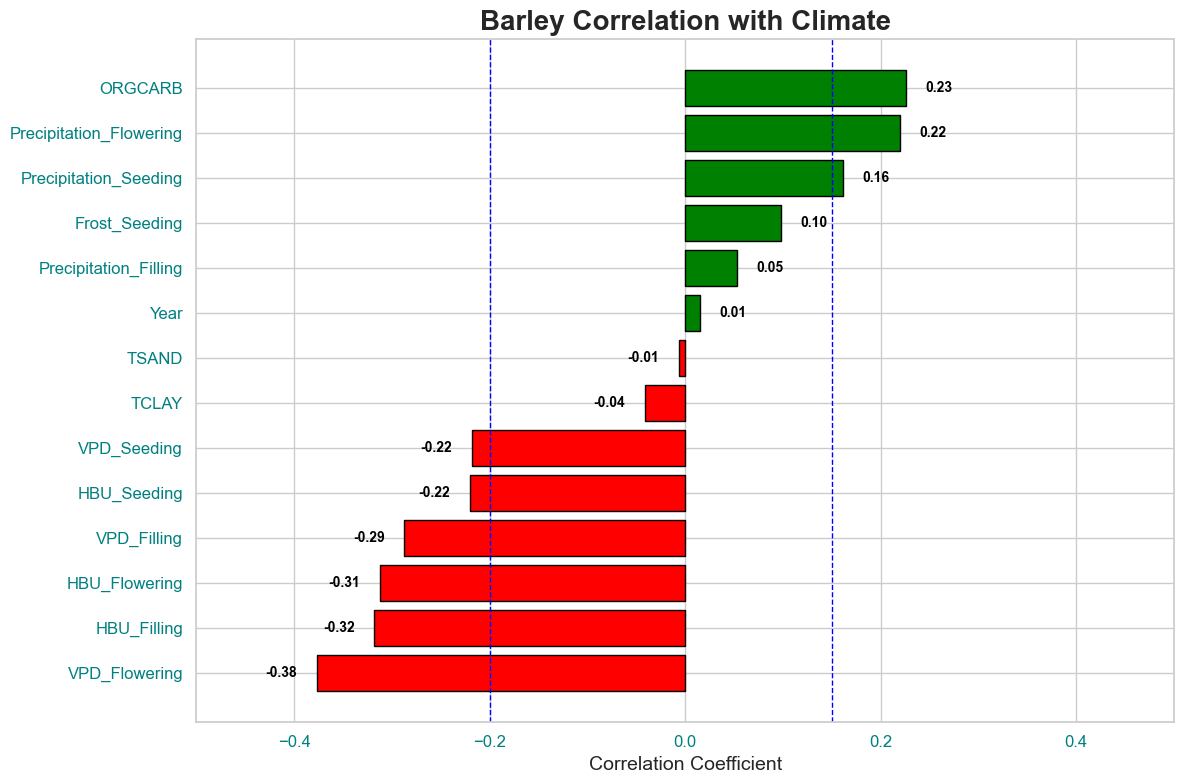

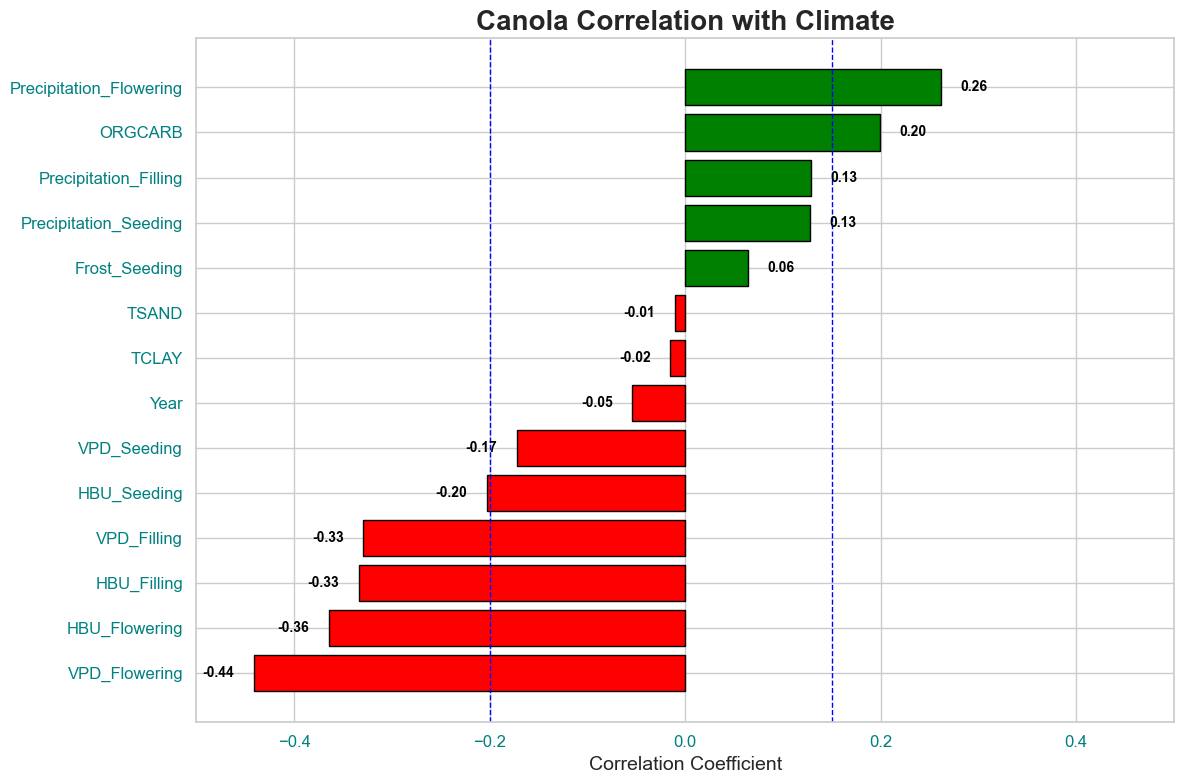

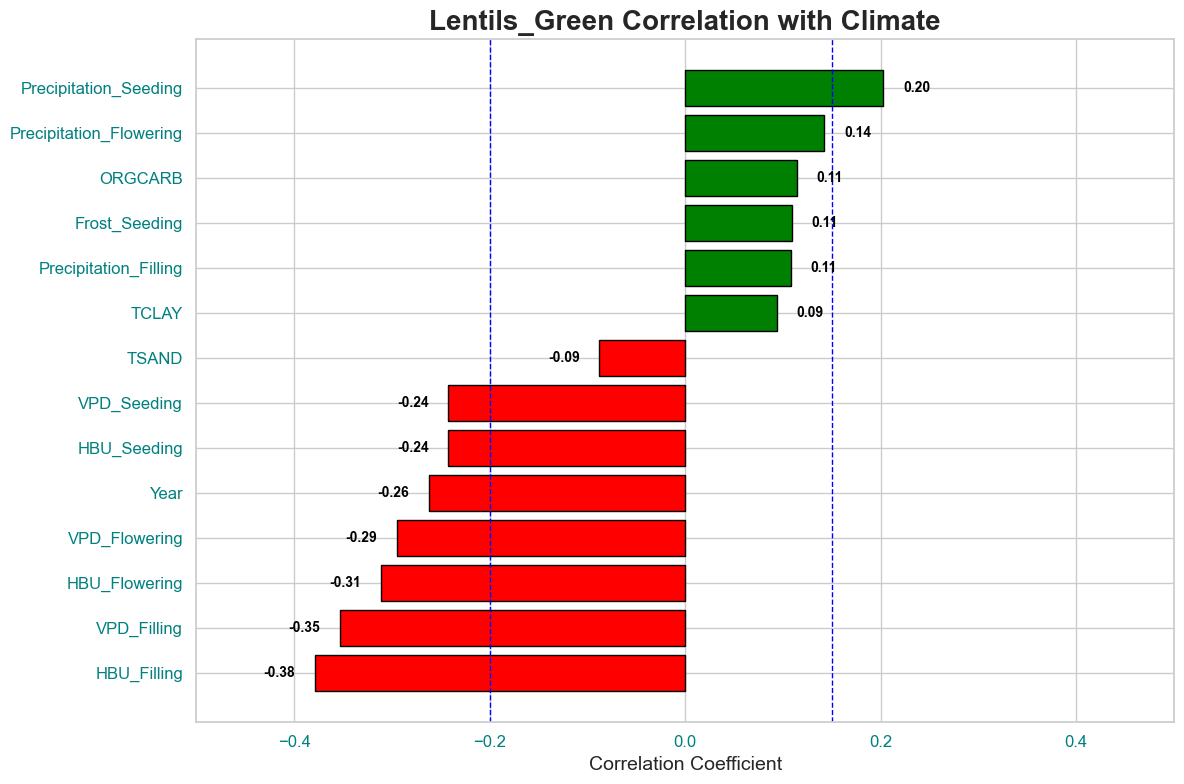

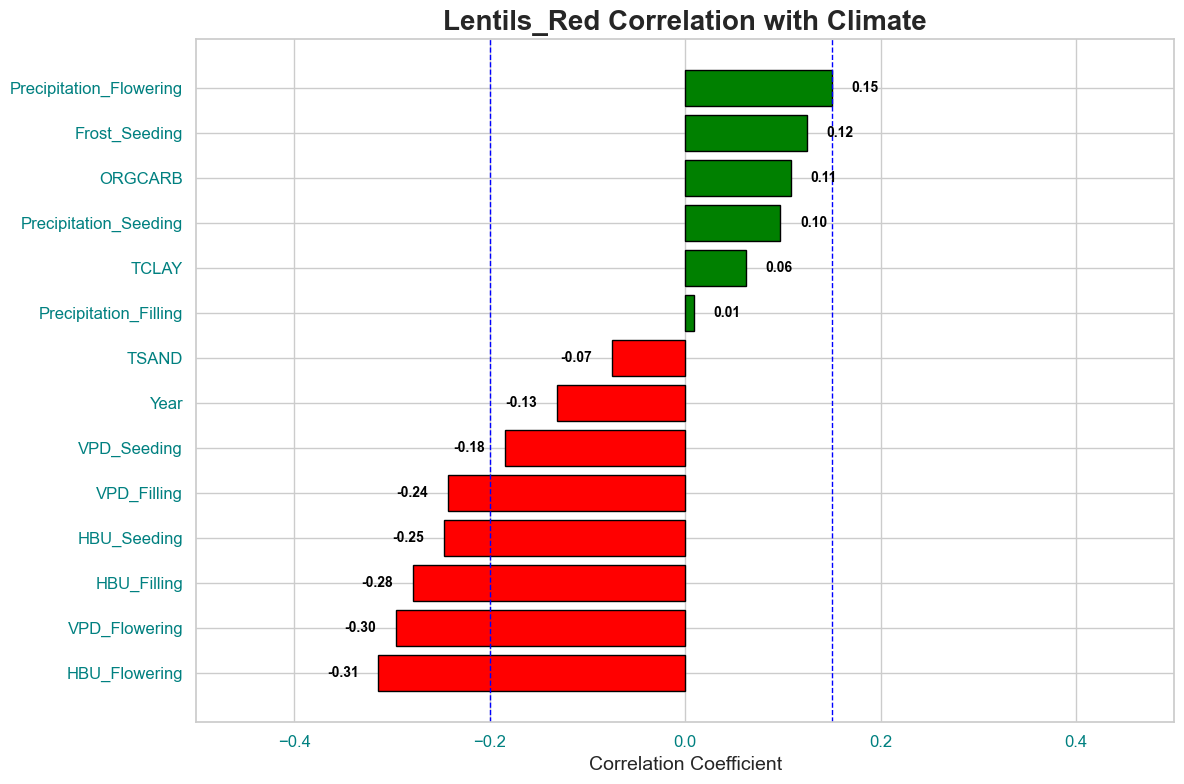

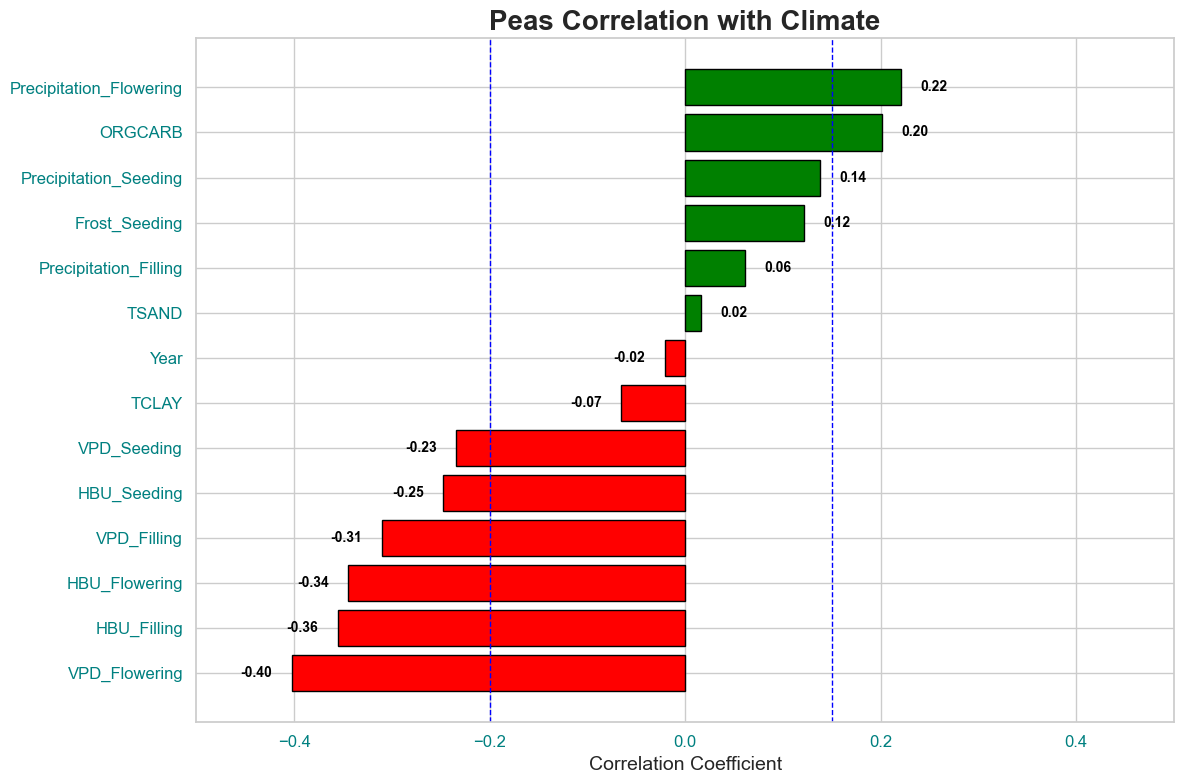

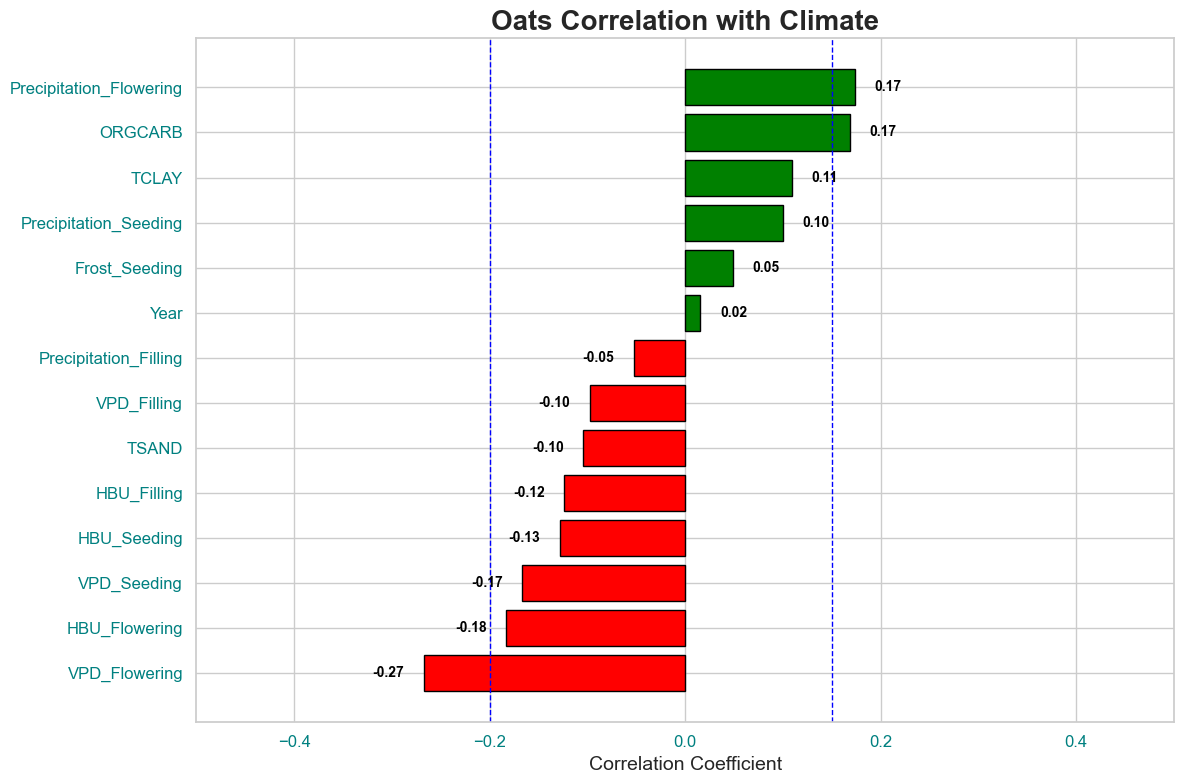

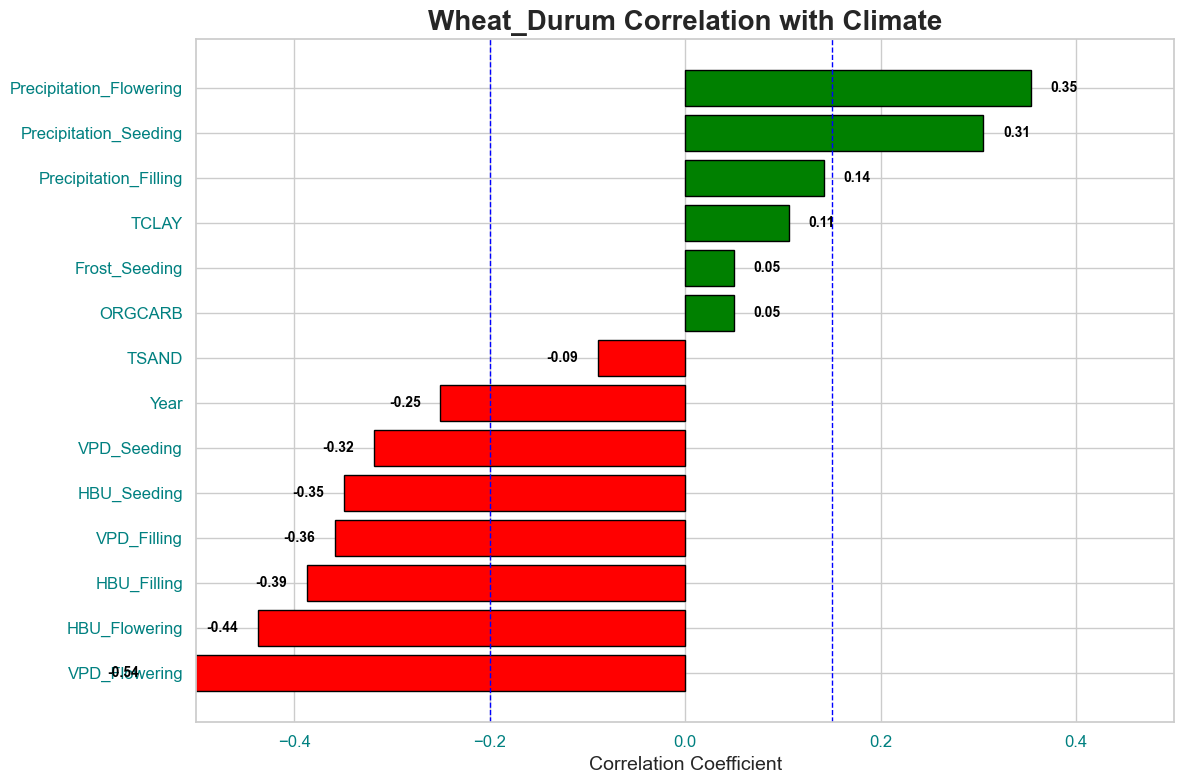

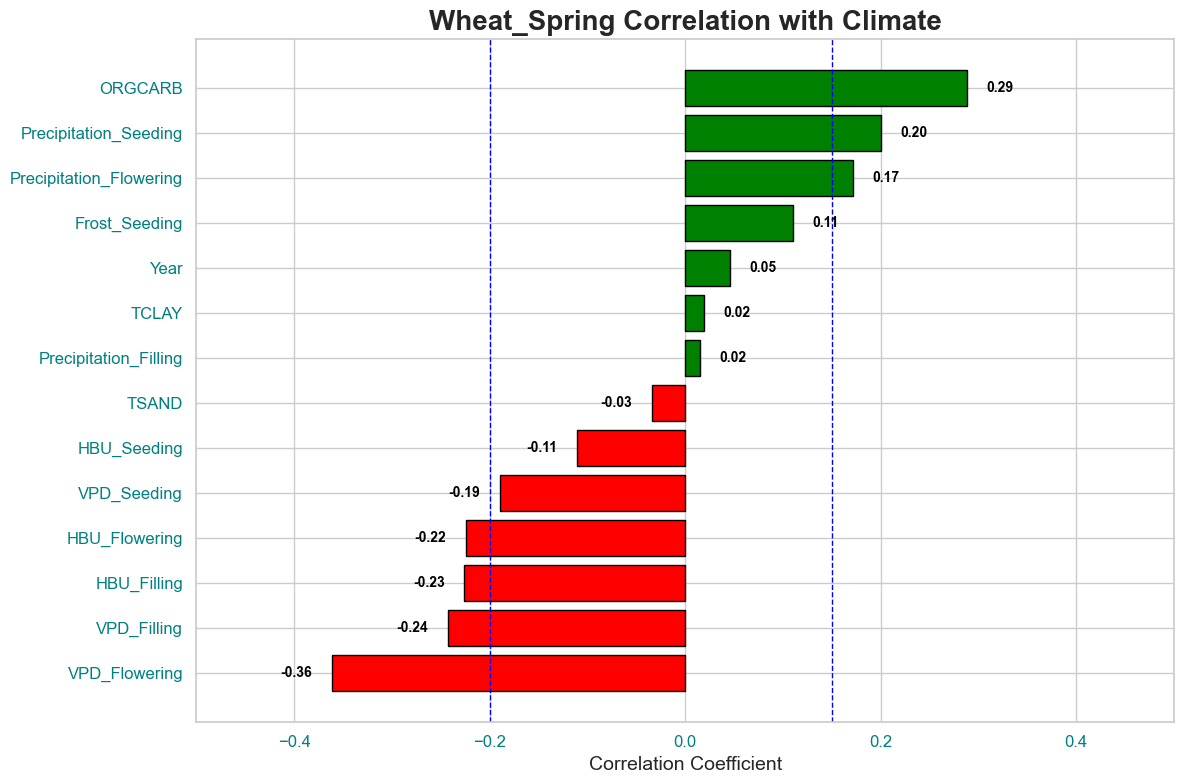

In [62]:
# Define the list of moisture columns
moisture_columns = ['SoilMoistAvg', 'swvl1', 'swvl2', 'swvl3']

# Define the list of 8 crops you want to visualize
list_of_crops = [
    'Barley',
    'Canola',
    'Lentils_Green',
    'Lentils_Red',
    'Peas',
    'Oats',
    'Wheat_Durum',
    'Wheat_Spring'
]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Iterate over each crop and create individual plots
for crop in list_of_crops:
    plt.figure(figsize=(12, 8))
    
    # Filter the DataFrame for the current crop
    df_crop = df[df['Crop'] == crop]
    
    if df_crop.empty:
        # If there is no data for the crop, display a message
        plt.text(0.5, 0.5, f'No data for {crop}', horizontalalignment='center', 
                 verticalalignment='center', fontsize=16, color='red')
        plt.title(f'{crop} Correlation with Yield', fontsize=20, fontweight='bold')
        plt.axis('off')  # Hide the axis
    else:
        # Drop irrelevant columns and compute correlations
        columns_to_drop = ['LLD', 'Crop', 'Township', 'SoilType','PR']
        existing_columns_to_drop = [col for col in columns_to_drop if col in df_crop.columns]
        df_corr = df_crop.drop(columns=existing_columns_to_drop)
        
        # Ensure 'Yield' is in the DataFrame
        if 'Yield' not in df_corr.columns:
            plt.text(0.5, 0.5, f'No Yield data for {crop}', horizontalalignment='center', 
                     verticalalignment='center', fontsize=16, color='red')
            plt.title(f'{crop} Correlation with Yield', fontsize=20, fontweight='bold')
            plt.axis('off')
        else:
            # Calculate correlations with Yield
            corr = df_corr.corr()['Yield'].drop('Yield').sort_values()
            
            if corr.empty:
                plt.text(0.5, 0.5, f'No correlation data for {crop}', horizontalalignment='center', 
                         verticalalignment='center', fontsize=16, color='red')
                plt.title(f'{crop} Correlation with Yield', fontsize=20, fontweight='bold')
                plt.axis('off')
            else:
                # Create horizontal bar plot
                y_pos = np.arange(len(corr))
                colors = ['green' if val >= 0 else 'red' for val in corr.values]
                plt.barh(y_pos, corr.values, color=colors, edgecolor='black')
                
                # Set y-ticks and labels
                plt.yticks(y_pos, corr.index, fontsize=12)
                
                # Add vertical lines at -0.20 and 0.15
                plt.axvline(-0.20, color='blue', linestyle='--', linewidth=1)
                plt.axvline(0.15, color='blue', linestyle='--', linewidth=1)
                
                # Annotate bars with correlation values
                for i, (value, name) in enumerate(zip(corr.values, corr.index)):
                    if value < 0:
                        ha = 'right'
                        x_position = value - 0.02
                    else:
                        ha = 'left'
                        x_position = value + 0.02
                    plt.text(x_position, i, f'{value:.2f}', va='center', ha=ha, color='black', fontsize=10, fontweight='bold')
                
                # Set title and labels
                plt.title(f'{crop} Correlation with Climate', fontsize=20, fontweight='bold')
                plt.xlabel('Correlation Coefficient', fontsize=14)
                plt.ylabel('')
                
                # Set x-axis limits for consistency
                plt.xlim(-0.5, 0.5)
                
                # Improve layout
                plt.xticks(fontsize=12, color='teal')
                plt.yticks(fontsize=12, color='teal')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()

## Variance Threshhold

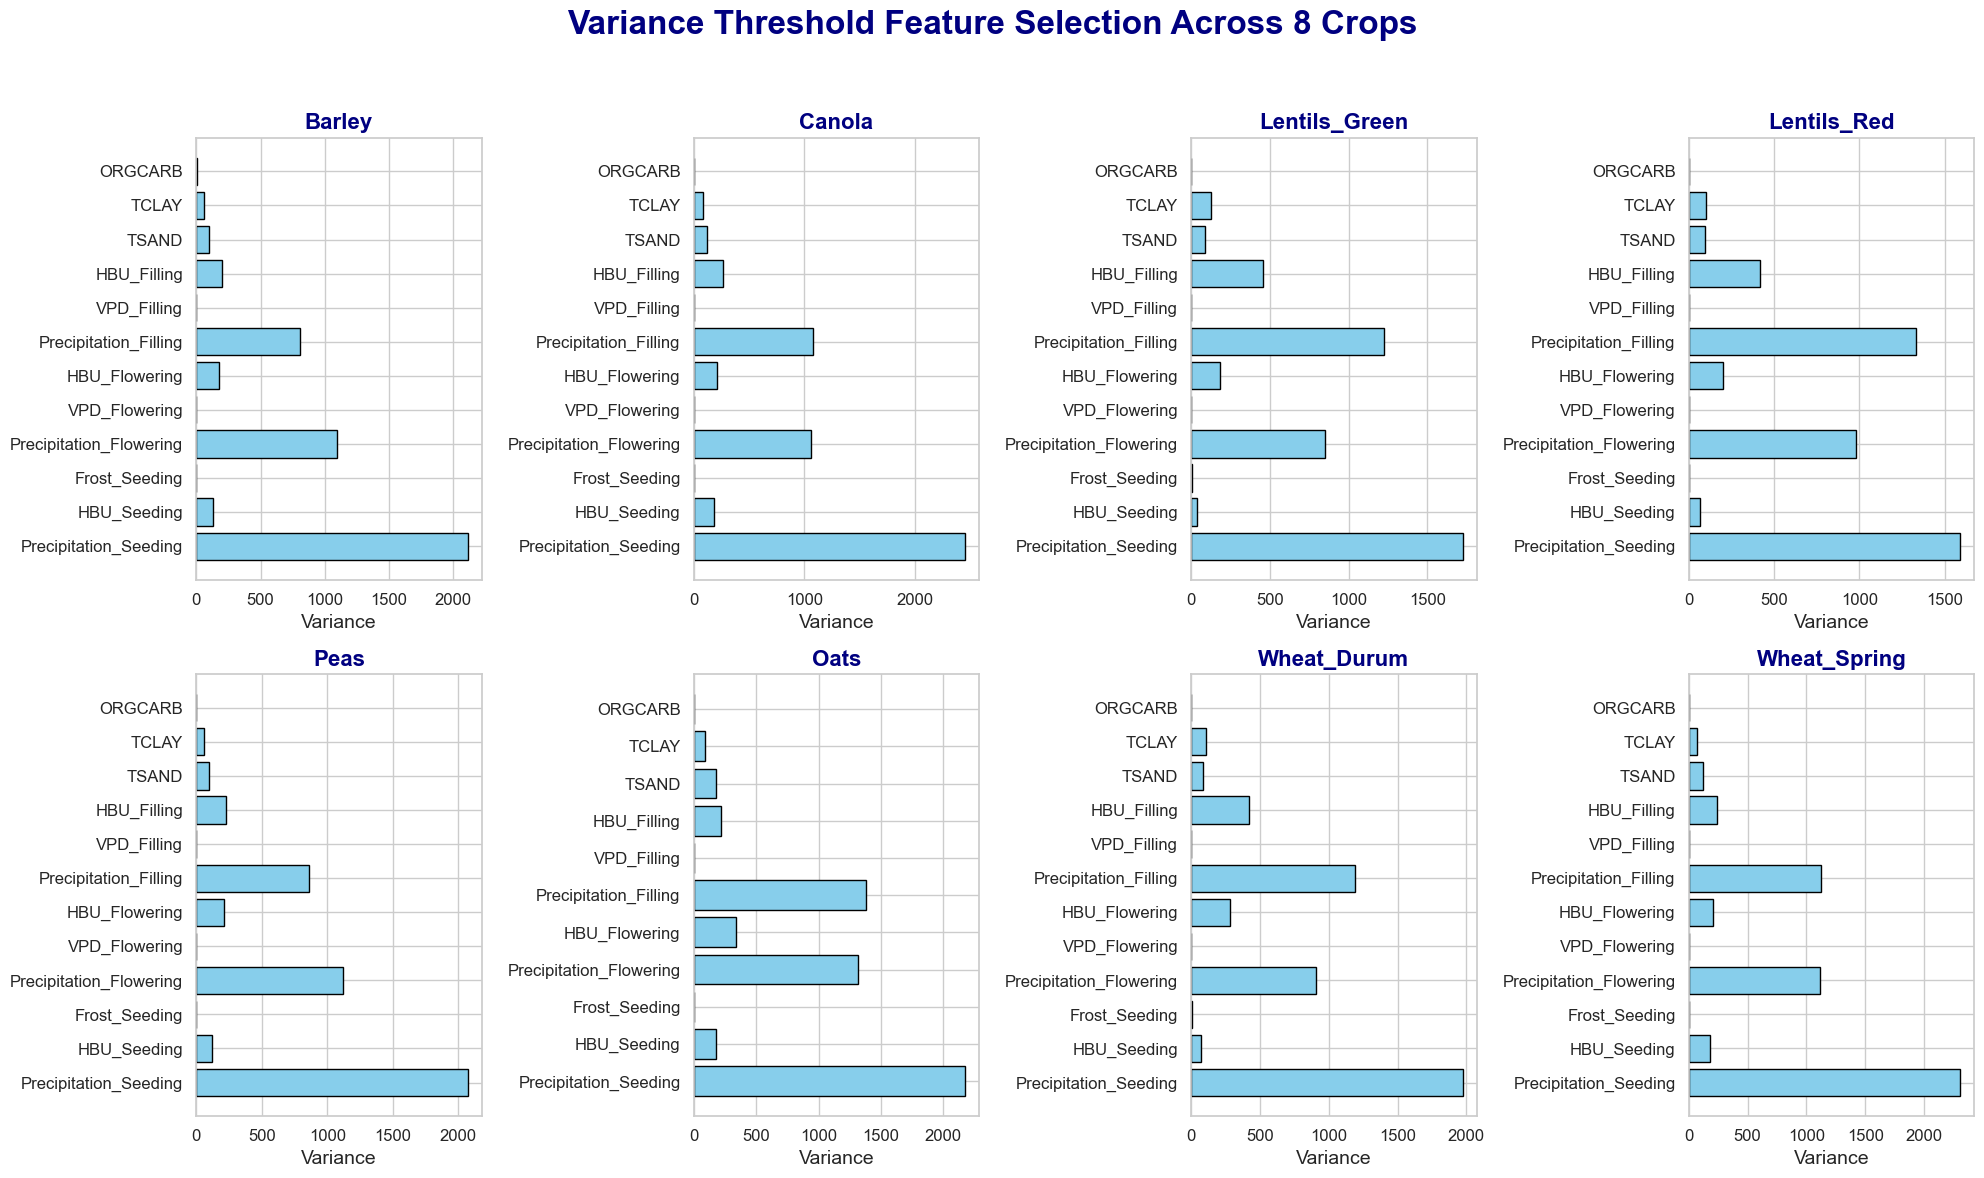

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Define the list of 8 crops
list_of_crops = [
    'Barley',
    'Canola',
    'Lentils_Green',
    'Lentils_Red',
    'Peas',
    'Oats',
    'Wheat_Durum',
    'Wheat_Spring'
]

# Create a figure with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# Iterate through each crop and plot on the corresponding subplot
for i, crop in enumerate(list_of_crops):
    ax = axes[i]
    
    # Filter the DataFrame for the current crop from df, not df_yield
    df_crop = df[df['Crop'] == crop]
    
    # Check if there is data for the crop
    if df_crop.empty:
        ax.text(0.5, 0.5, f'No data for {crop}', horizontalalignment='center', 
                verticalalignment='center', fontsize=16, color='red', transform=ax.transAxes)
        ax.set_title(f'{crop} - No Data Available', fontsize=20, fontweight='bold')
        ax.axis('off')
        continue
    
    # Drop irrelevant columns so that only feature columns remain
    columns_to_drop = ['Yield', 'Crop', 'Township', 'Year','PR']
    existing_columns_to_drop = [col for col in columns_to_drop if col in df_crop.columns]
    X_crop = df_crop.drop(columns=existing_columns_to_drop)
    
    # Check if X_crop has any columns left
    if X_crop.empty:
        ax.text(0.5, 0.5, f'No features available for {crop}', horizontalalignment='center', 
                verticalalignment='center', fontsize=16, color='red', transform=ax.transAxes)
        ax.set_title(f'{crop} - No Features Available', fontsize=20, fontweight='bold')
        ax.axis('off')
        continue
    
    # Apply VarianceThreshold
    selector = VarianceThreshold(threshold=0.1)
    selector.fit(X_crop)
    
    # Get selected features and their variances
    selected_features = X_crop.columns[selector.get_support()]
    variances = selector.variances_[selector.get_support()]
    
    # Check if any features are selected
    if len(selected_features) == 0:
        ax.text(0.5, 0.5, f'No features selected for {crop}', horizontalalignment='center', 
                verticalalignment='center', fontsize=16, color='red', transform=ax.transAxes)
        ax.set_title(f'{crop} - No Features Selected', fontsize=20, fontweight='bold')
        ax.axis('off')
        continue
    
    # Create a horizontal bar plot of variances for the selected features
    ax.barh(selected_features, variances, color='skyblue', edgecolor='black')
    ax.set_title(f'{crop}', fontsize=16, fontweight='bold', color='navy')
    ax.set_xlabel('Variance', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Hide any extra subplots (if any)
for j in range(len(list_of_crops), len(axes)):
    axes[j].axis('off')

# Add an overall title for the entire figure
fig.suptitle("Variance Threshold Feature Selection Across 8 Crops", fontsize=24, fontweight='bold', color='navy', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Mutual Information

/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_9856/3109077564.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette='RdYlGn_r', ax=ax)
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_9856/3109077564.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette='RdYlGn_r', ax=ax)
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_9856/3109077564.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series

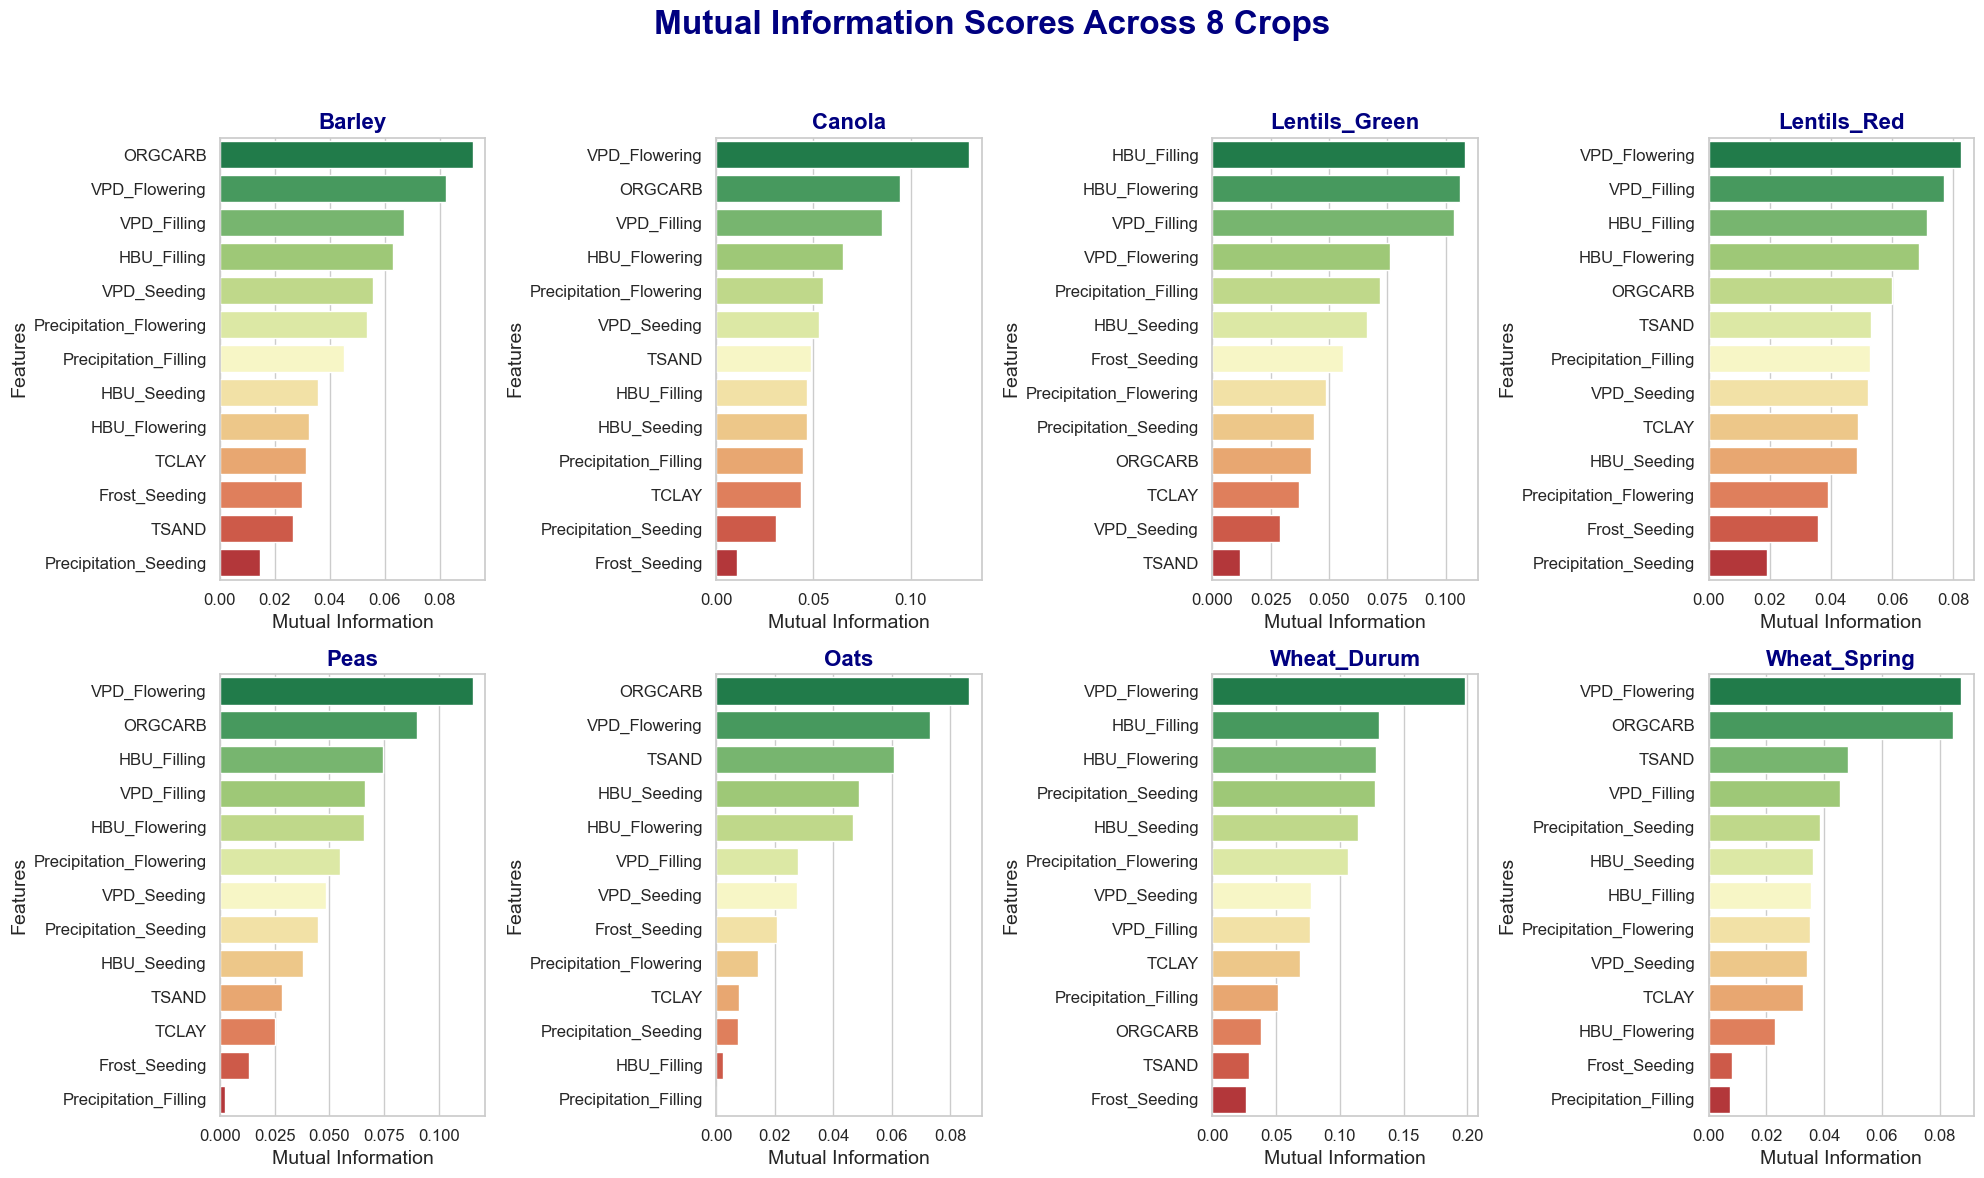

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Define the list of 8 crops
list_of_crops = [
    'Barley',
    'Canola',
    'Lentils_Green',
    'Lentils_Red',
    'Peas',
    'Oats',
    'Wheat_Durum',
    'Wheat_Spring'
]

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# Iterate through each crop and plot the mutual information scores on the corresponding subplot
for i, crop in enumerate(list_of_crops):
    ax = axes[i]
    
    # Filter the DataFrame for the current crop
    df_crop = df[df['Crop'] == crop]
    
    # Check if there is data for the crop
    if df_crop.empty:
        ax.text(0.5, 0.5, f'No data for {crop}', horizontalalignment='center',
                verticalalignment='center', fontsize=16, color='red', transform=ax.transAxes)
        ax.set_title(f'{crop} - No Data Available', fontsize=20, fontweight='bold')
        ax.axis('off')
        continue
    
    # Define features (X) and target (y)
    columns_to_drop = ['Yield', 'LLD', 'Crop', 'Township', 'SoilType', 'Year','PR']
    existing_columns_to_drop = [col for col in columns_to_drop if col in df_crop.columns]
    X = df_crop.drop(columns=existing_columns_to_drop)
    y = df_crop['Yield']
    
    # Handle categorical variables in features (if any)
    X_encoded = X.copy()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_cols:
        le = LabelEncoder()
        for col in categorical_cols:
            X_encoded[col] = le.fit_transform(X[col].astype(str))
    
    # Calculate Mutual Information scores
    mi_scores = mutual_info_regression(X_encoded, y, random_state=42)
    mi_series = pd.Series(mi_scores, index=X_encoded.columns)
    mi_series = mi_series.sort_values(ascending=False)
    
    # Plot the Mutual Information scores as a horizontal bar plot
    sns.barplot(x=mi_series.values, y=mi_series.index, palette='RdYlGn_r', ax=ax)
    ax.set_title(f'{crop}', fontsize=16, fontweight='bold', color='navy')
    ax.set_xlabel('Mutual Information', fontsize=14)
    ax.set_ylabel('Features', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Hide any extra subplots if there are fewer than 8 crops (should be exactly 8 here)
for j in range(len(list_of_crops), len(axes)):
    axes[j].axis('off')

fig.suptitle("Mutual Information Scores Across 8 Crops", fontsize=24, fontweight='bold', color='navy', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Anova

/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_9856/130342444.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f_series.values, y=f_series.index, palette='coolwarm', ax=ax)
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_9856/130342444.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f_series.values, y=f_series.index, palette='coolwarm', ax=ax)
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_9856/130342444.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f_series.values, y=f_series.index, p

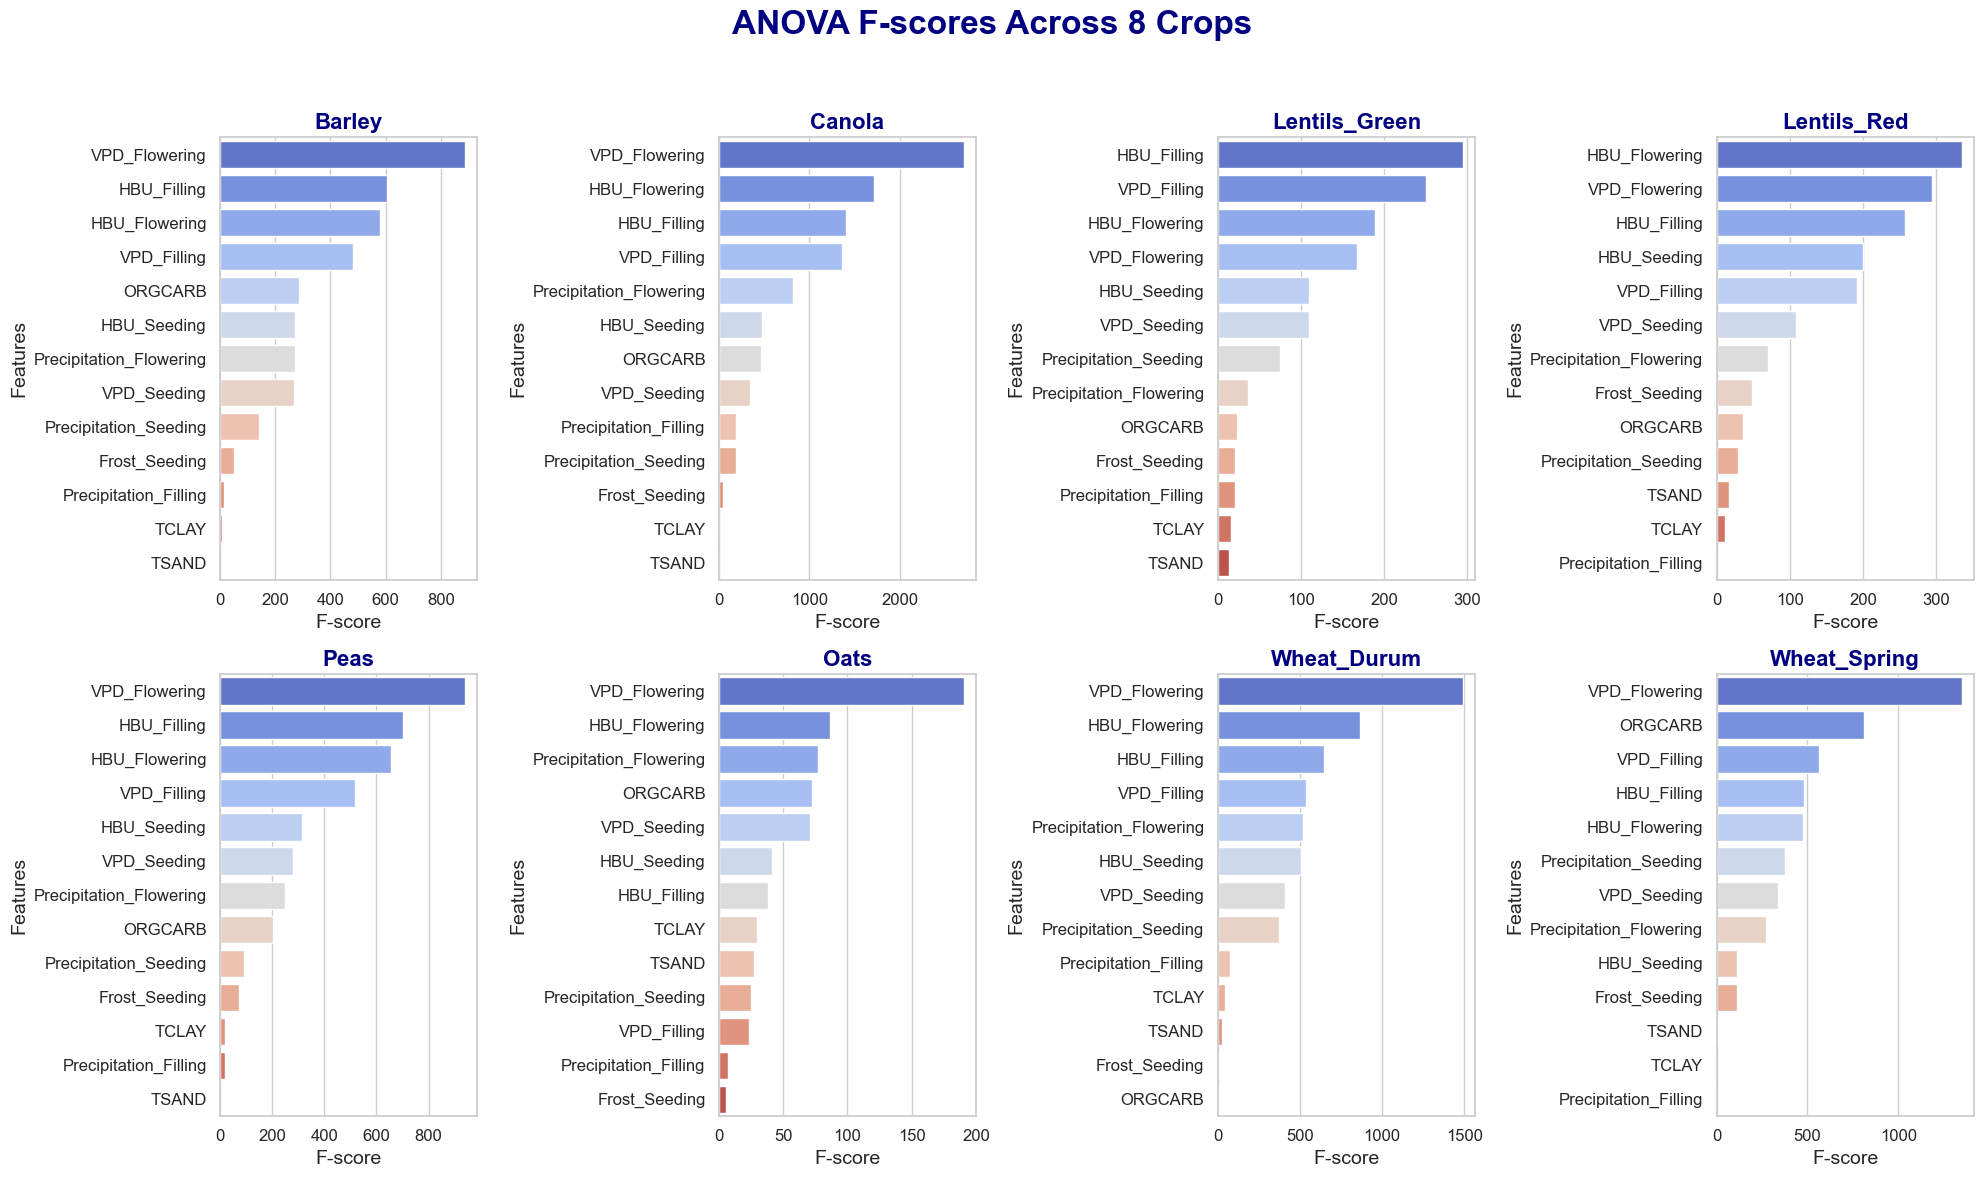

In [65]:
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder

# Define the list of 8 crops
list_of_crops = [
    'Barley',
    'Canola',
    'Lentils_Green',
    'Lentils_Red',
    'Peas',
    'Oats',
    'Wheat_Durum',
    'Wheat_Spring'
]

# Create a figure with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# Iterate through each crop and plot on the corresponding subplot
for i, crop in enumerate(list_of_crops):
    ax = axes[i]
    
    # Filter the DataFrame for the current crop
    df_crop = df[df['Crop'] == crop]
    
    # If no data is available for the crop, display a message in the subplot
    if df_crop.empty:
        ax.text(0.5, 0.5, f'No data for {crop}', 
                horizontalalignment='center', verticalalignment='center',
                fontsize=16, color='red', transform=ax.transAxes)
        ax.set_title(f'{crop} - No Data Available', fontsize=20, fontweight='bold')
        ax.axis('off')
        continue
    
    # Define features (X) and target (y)
    columns_to_drop = ['Yield', 'LLD', 'Crop', 'Township', 'SoilType', 'Year','PR']
    existing_columns_to_drop = [col for col in columns_to_drop if col in df_crop.columns]
    X = df_crop.drop(columns=existing_columns_to_drop)
    y = df_crop['Yield']
    
    # Handle categorical variables (if any) by encoding them
    X_encoded = X.copy()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_cols:
        le = LabelEncoder()
        for col in categorical_cols:
            X_encoded[col] = le.fit_transform(X[col].astype(str))
    
    # Calculate ANOVA F-scores
    f_scores, p_values = f_regression(X_encoded, y)
    f_series = pd.Series(f_scores, index=X_encoded.columns).sort_values(ascending=False)
    
    # Plot the F-scores as a horizontal bar plot
    sns.barplot(x=f_series.values, y=f_series.index, palette='coolwarm', ax=ax)
    ax.set_title(f'{crop}', fontsize=16, fontweight='bold', color='navy')
    ax.set_xlabel('F-score', fontsize=14)
    ax.set_ylabel('Features', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Hide any extra subplots (if any)
for j in range(len(list_of_crops), len(axes)):
    axes[j].axis('off')

# Add an overall title for the entire figure
fig.suptitle("ANOVA F-scores Across 8 Crops", fontsize=24, fontweight='bold', color='navy', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Filter Methods

## Forward Selection

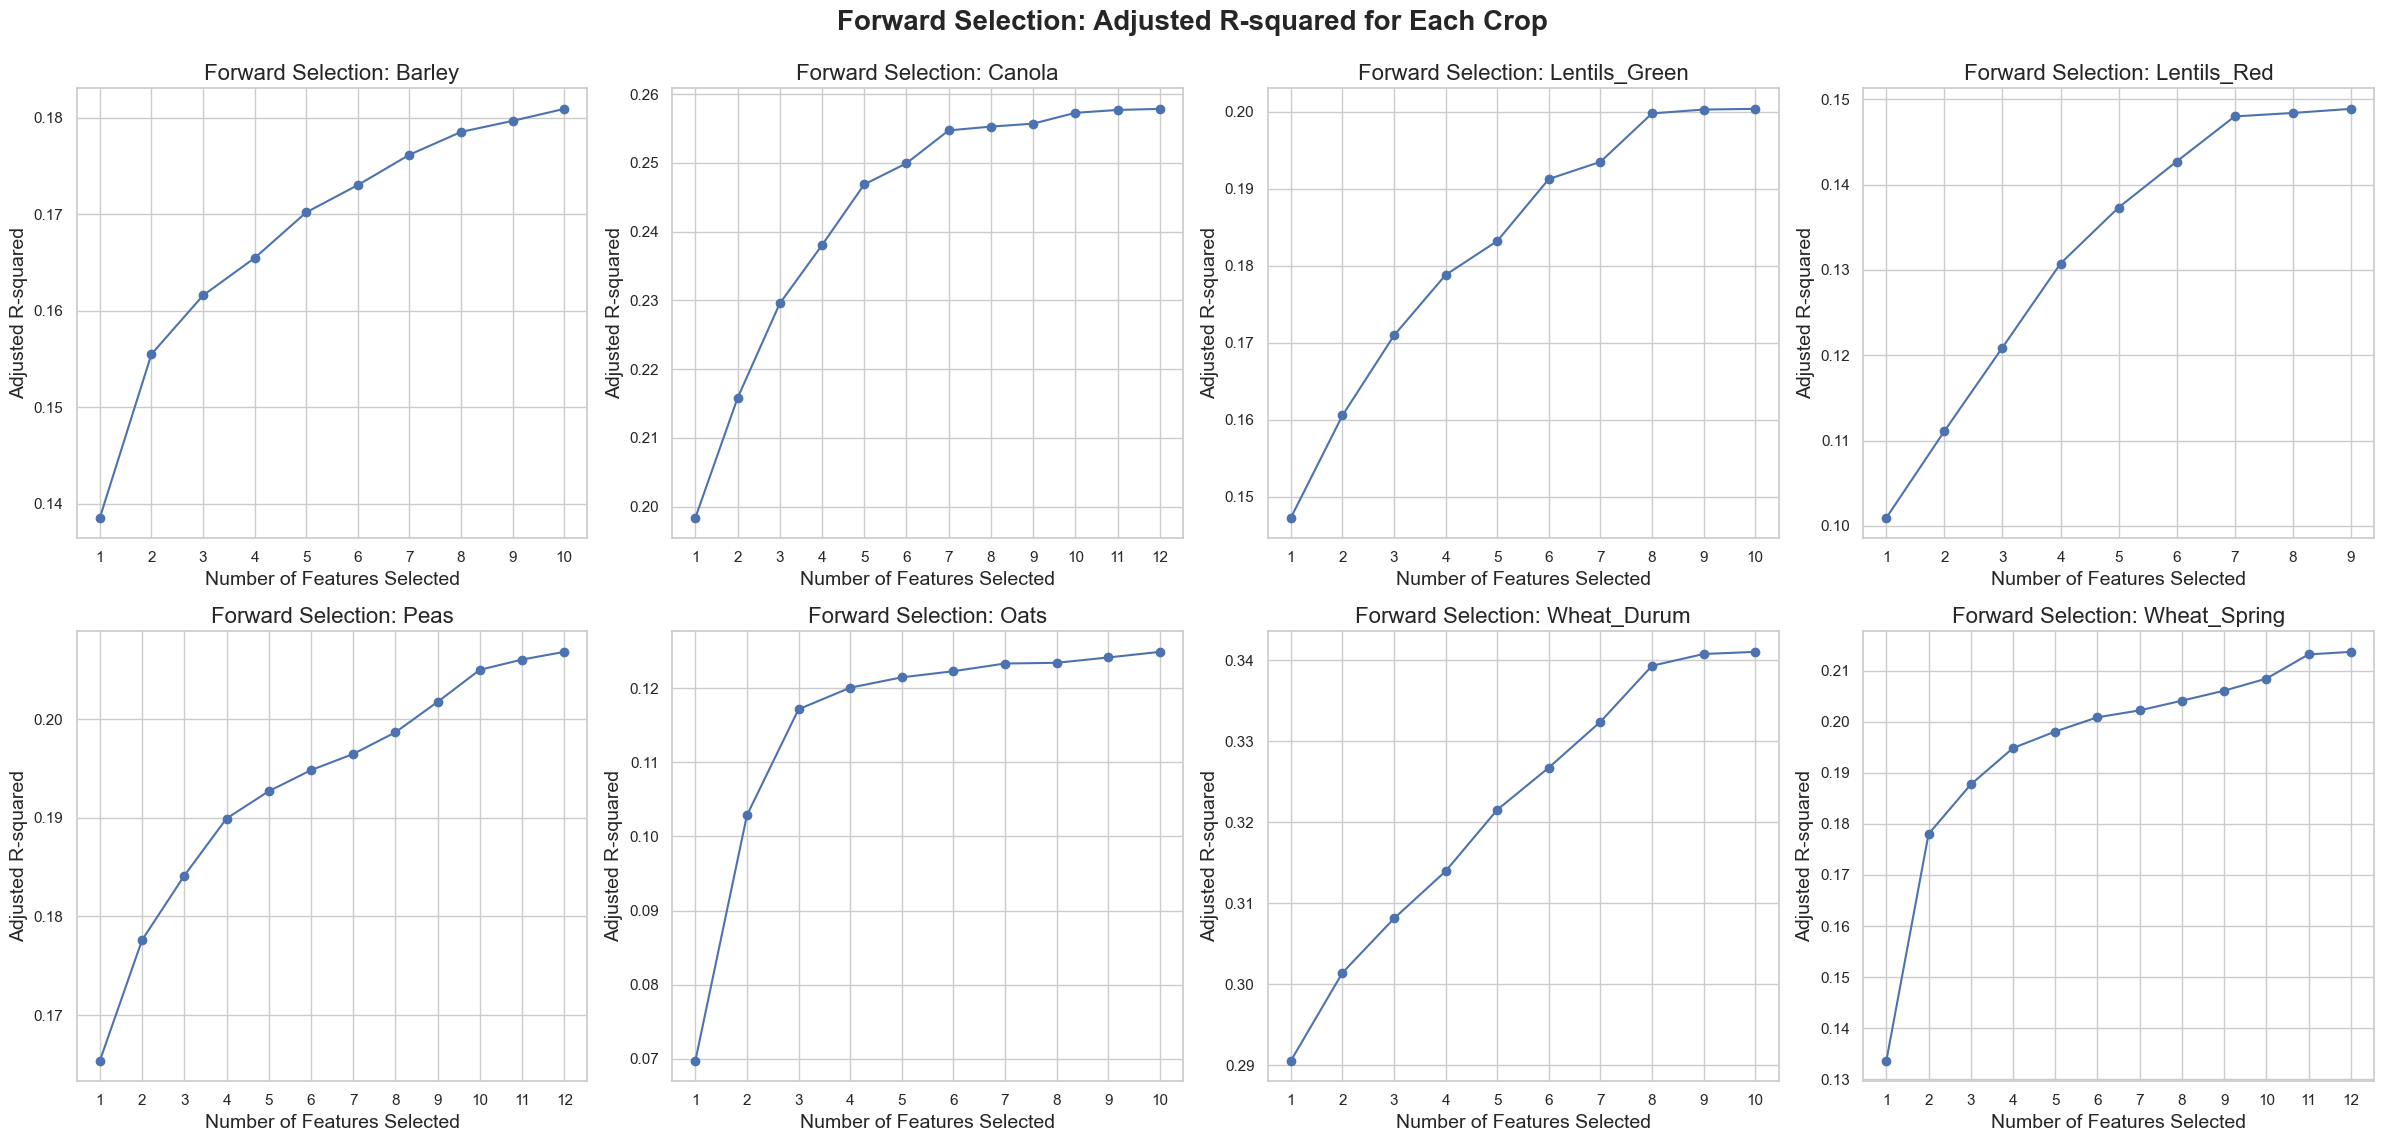

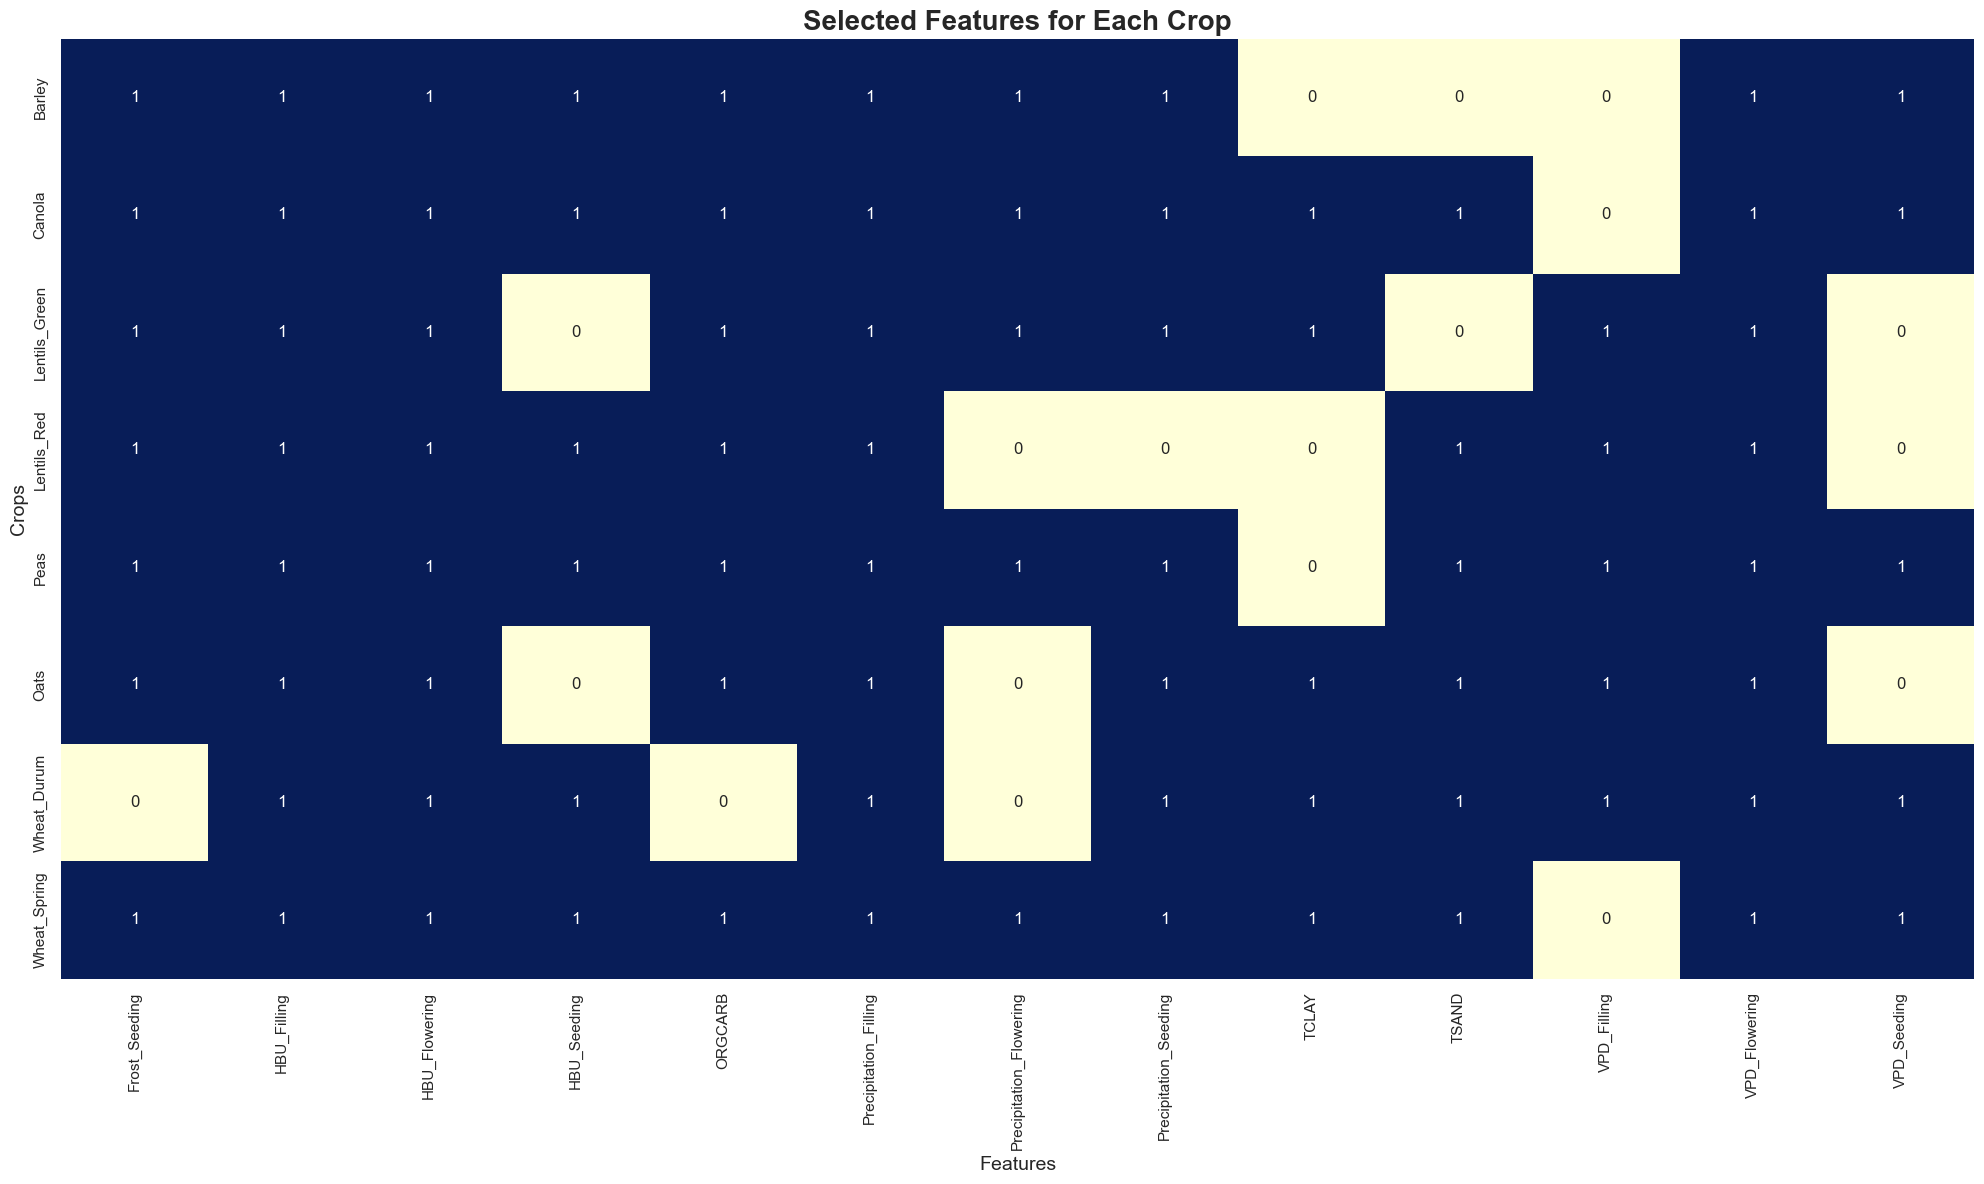

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

def forward_selection(data, response):
    initial_features = data.columns.tolist()
    initial_features.remove(response)
    best_features = []
    best_adj_r2 = -np.inf
    adj_r2_history = []

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        adj_r2_candidates = pd.Series(index=remaining_features, dtype=float)

        for new_column in remaining_features:
            model = sm.OLS(data[response], add_constant(data[best_features + [new_column]])).fit()
            adj_r2_candidates[new_column] = model.rsquared_adj

        best_feature = adj_r2_candidates.idxmax()
        best_adj_r2_new = adj_r2_candidates.max()

        if best_adj_r2_new > best_adj_r2:
            best_features.append(best_feature)
            adj_r2_history.append(best_adj_r2_new)
            best_adj_r2 = best_adj_r2_new
            initial_features.remove(best_feature)
        else:
            break

    return best_features, adj_r2_history

selected_features = {}
adj_r2_plot_data = {}

# Define the list of 8 crops
list_of_crops = [
    'Barley',
    'Canola',
    'Lentils_Green',
    'Lentils_Red',
    'Peas',
    'Oats',
    'Wheat_Durum',
    'Wheat_Spring'
]

# Create 'dfs' dictionary by splitting 'df' based on 'Crop' column
dfs = {crop: df[df['Crop'] == crop].copy() for crop in list_of_crops}

# Initialize subplots: 2 rows x 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

for idx, (crop, df_crop) in enumerate(dfs.items()):
    ax = axes[idx]
    
    # Check if 'Yield' column exists
    if 'Yield' not in df_crop.columns:
        ax.text(0.5, 0.5, f"'Yield' not found for {crop}", horizontalalignment='center',
                verticalalignment='center', fontsize=14, color='red')
        ax.set_title(f'{crop} - No Yield Data', fontsize=16)
        ax.axis('off')
        continue

    # Define features (X) and target (y)
    X = df_crop.drop(columns=['Yield', 'LLD', 'Crop', 'Township', 'SoilType', 'Year','PR'], errors='ignore')
    y = df_crop['Yield']
    
    # Split the data into training and test sets
    train_df, test_df = train_test_split(df_crop, test_size=0.2, random_state=42)

    # Encode categorical variables
    train_X = train_df.drop(columns=['Yield', 'LLD', 'Crop', 'Township', 'SoilType', 'Year'], errors='ignore').copy()
    categorical_cols = train_X.select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_cols:
        le = LabelEncoder()
        for col in categorical_cols:
            train_X[col] = le.fit_transform(train_X[col].astype(str))

    # Update train_df with encoded features
    train_df_encoded = train_X.copy()
    train_df_encoded['Yield'] = train_df['Yield'].values

    # Perform forward selection
    best_features, adj_r2_history = forward_selection(train_df_encoded, 'Yield')
    selected_features[crop] = best_features
    adj_r2_plot_data[crop] = adj_r2_history

    # Plot Adjusted R-squared vs Number of Features
    ax.plot(range(1, len(adj_r2_history)+1), adj_r2_history, marker='o', linestyle='-')
    ax.set_title(f'Forward Selection: {crop}', fontsize=16)
    ax.set_xlabel('Number of Features Selected', fontsize=14)
    ax.set_ylabel('Adjusted R-squared', fontsize=14)
    ax.set_xticks(range(1, len(adj_r2_history)+1))
    ax.grid(True)

# Remove any empty subplots if there are fewer than 8 crops
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Forward Selection: Adjusted R-squared for Each Crop', fontsize=20, fontweight='bold')
plt.show()

# Create a Heatmap for Selected Features
# Gather all unique selected features
all_selected_features = set()
for features in selected_features.values():
    all_selected_features.update(features)

# Create DataFrame with crops as rows and features as columns
feature_list = sorted(all_selected_features)
heatmap_data = pd.DataFrame(0, index=list_of_crops, columns=feature_list)

for crop, features in selected_features.items():
    for feature in features:
        heatmap_data.loc[crop, feature] = 1

# Plot Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Selected Features for Each Crop', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Crops', fontsize=14)
plt.tight_layout()
plt.show()

## Backward Elimination

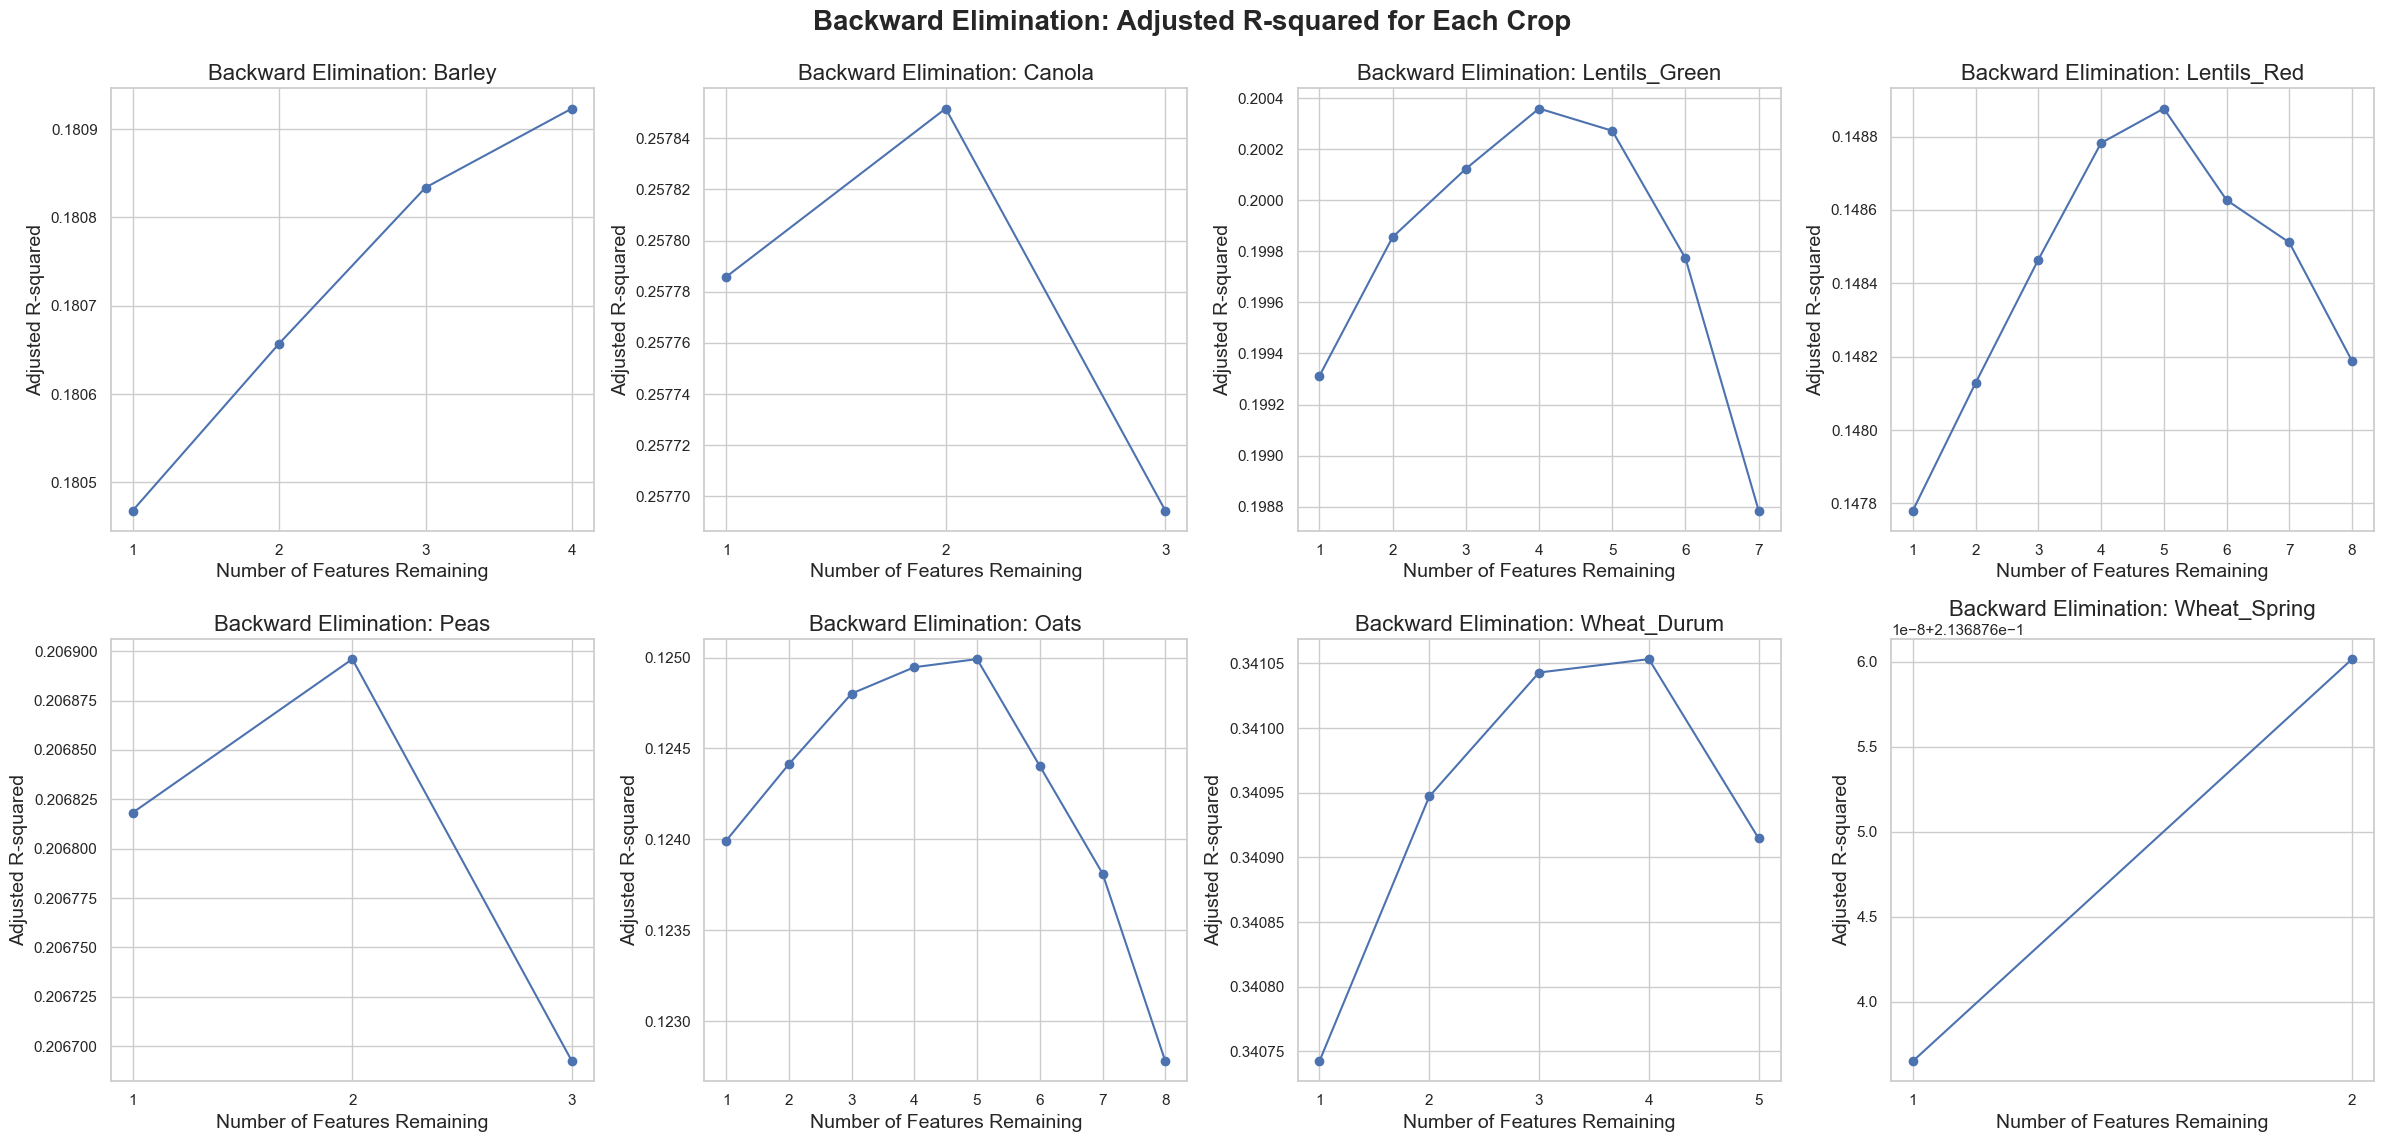

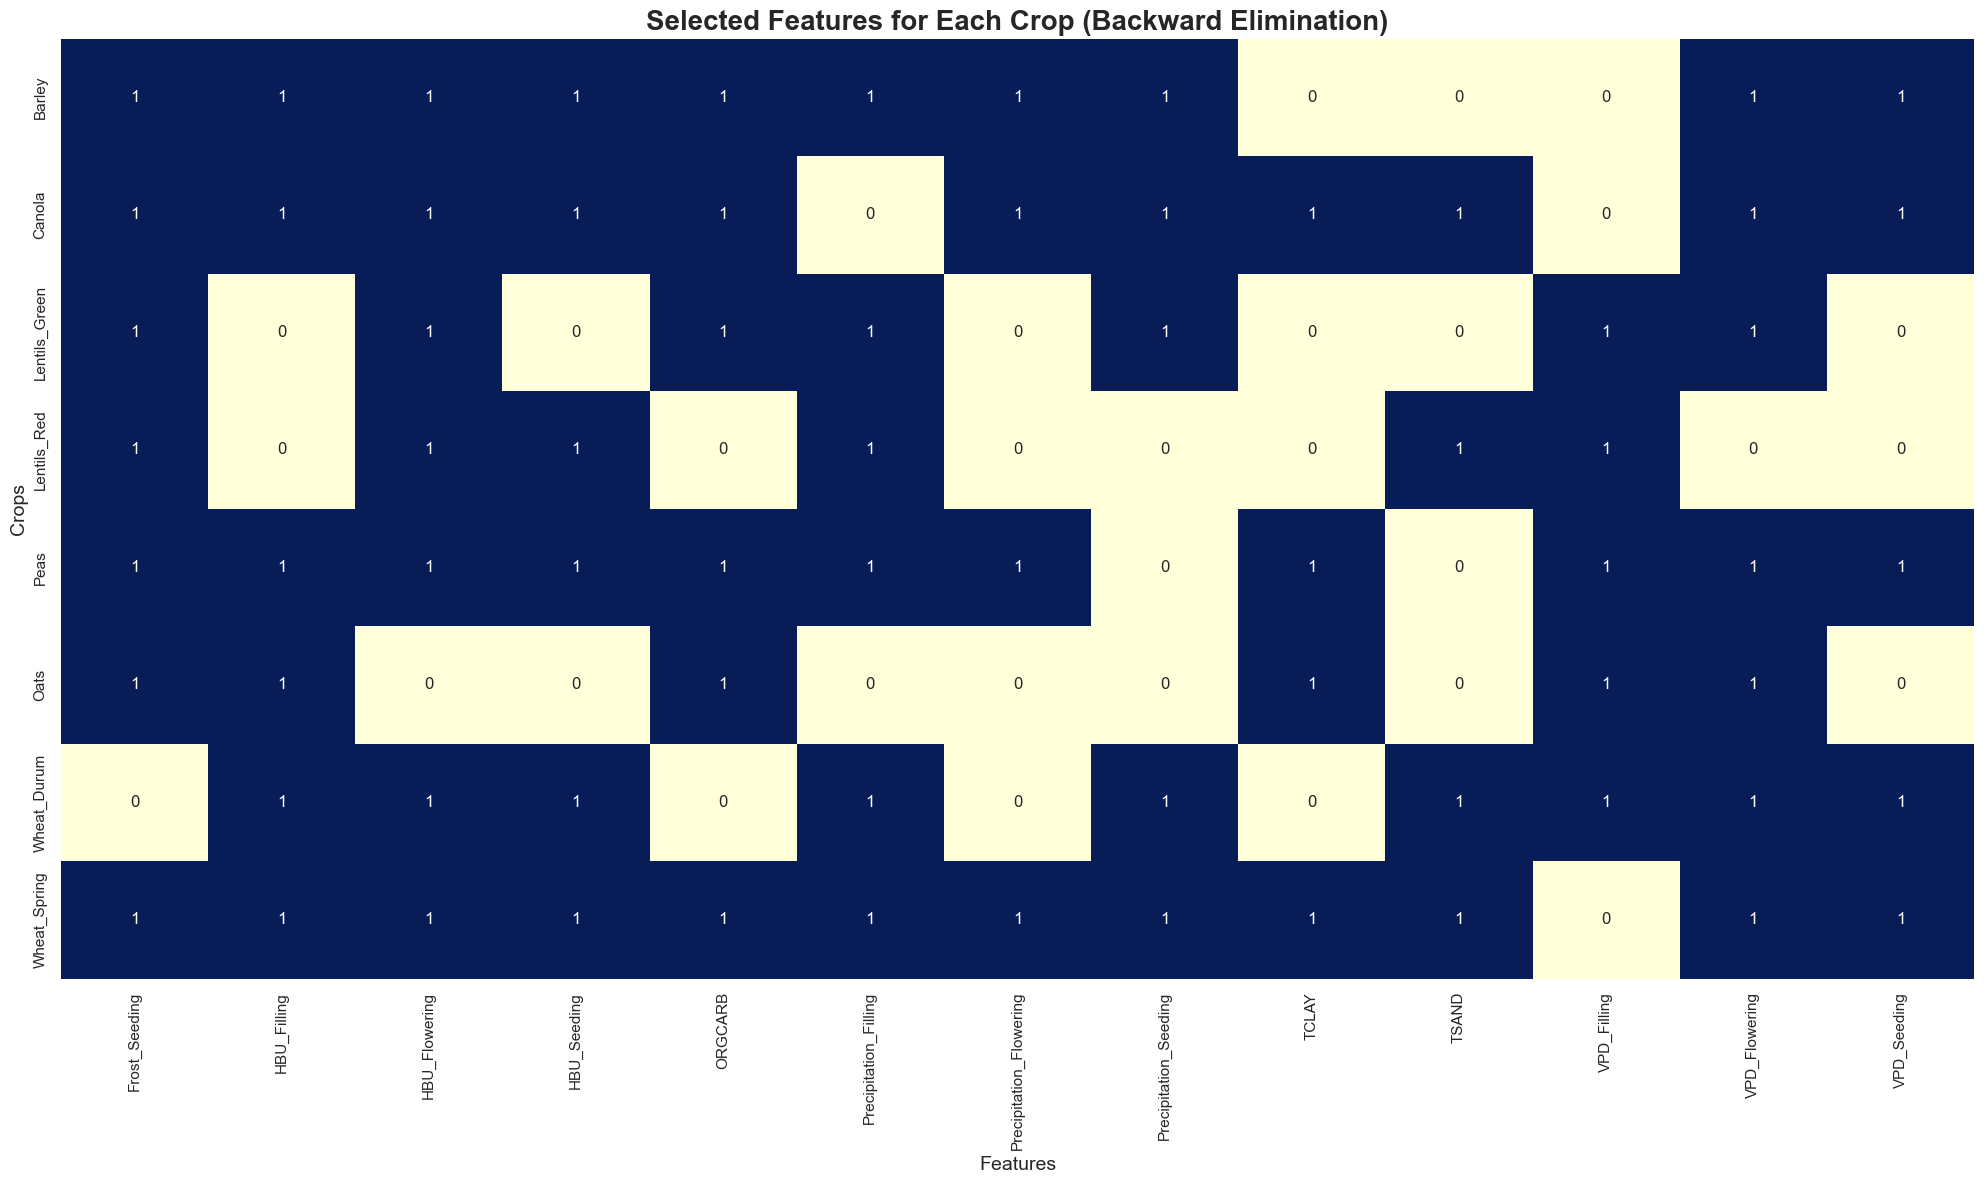

In [67]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


def backward_elimination(data, response, significance_level=0.05):
    features = data.columns.tolist()
    features.remove(response)
    adj_r2_history = []
    
    while len(features) > 0:
        X = sm.add_constant(data[features])
        model = sm.OLS(data[response], X).fit()
        p_values = model.pvalues.iloc[1:]  # Exclude intercept
        
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            adj_r2_history.append(model.rsquared_adj)
        else:
            adj_r2_history.append(model.rsquared_adj)
            break
    
    return features, adj_r2_history

selected_features = {}
adj_r2_plot_data = {}

# Define the list of 8 crops
list_of_crops = [
    'Barley',
    'Canola',
    'Lentils_Green',
    'Lentils_Red',
    'Peas',
    'Oats',
    'Wheat_Durum',
    'Wheat_Spring'
]

# Create 'dfs' dictionary by splitting 'df' based on 'Crop' column
dfs = {crop: df[df['Crop'] == crop].copy() for crop in list_of_crops}

# Initialize subplots: 2 rows x 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

for idx, (crop, df_crop) in enumerate(dfs.items()):
    ax = axes[idx]
    
    # Check if 'Yield' column exists
    if 'Yield' not in df_crop.columns:
        ax.text(0.5, 0.5, f"'Yield' not found for {crop}", horizontalalignment='center',
                verticalalignment='center', fontsize=14, color='red')
        ax.set_title(f'{crop} - No Yield Data', fontsize=16)
        ax.axis('off')
        continue

    # Define features (X) and target (y)
    X = df_crop.drop(columns=['Yield', 'LLD', 'Crop', 'Township', 'SoilType', 'Year', 'PR'], errors='ignore')
    y = df_crop['Yield']
    
    # Split the data into training and test sets
    train_df, test_df = train_test_split(df_crop, test_size=0.2, random_state=42)

    # Encode categorical variables
    train_X = train_df.drop(columns=['Yield', 'LLD', 'Crop', 'Township', 'SoilType', 'Year'], errors='ignore').copy()
    categorical_cols = train_X.select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_cols:
        le = LabelEncoder()
        for col in categorical_cols:
            train_X[col] = le.fit_transform(train_X[col].astype(str))

    # Update train_df with encoded features
    train_df_encoded = train_X.copy()
    train_df_encoded['Yield'] = train_df['Yield'].values

    # Perform backward elimination
    best_features, adj_r2_history = backward_elimination(train_df_encoded, 'Yield')
    selected_features[crop] = best_features
    adj_r2_plot_data[crop] = adj_r2_history

    # Plot Adjusted R-squared vs Number of Features
    ax.plot(range(1, len(adj_r2_history)+1), adj_r2_history, marker='o', linestyle='-')
    ax.set_title(f'Backward Elimination: {crop}', fontsize=16)
    ax.set_xlabel('Number of Features Remaining', fontsize=14)
    ax.set_ylabel('Adjusted R-squared', fontsize=14)
    ax.set_xticks(range(1, len(adj_r2_history)+1))
    ax.grid(True)

# Remove any empty subplots if there are fewer than 8 crops
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Backward Elimination: Adjusted R-squared for Each Crop', fontsize=20, fontweight='bold')
plt.show()

# Create a Heatmap for Selected Features
# Gather all unique selected features
all_selected_features = set()
for features in selected_features.values():
    all_selected_features.update(features)

# Create DataFrame with crops as rows and features as columns
feature_list = sorted(all_selected_features)
heatmap_data = pd.DataFrame(0, index=list_of_crops, columns=feature_list)

for crop, features in selected_features.items():
    for feature in features:
        heatmap_data.loc[crop, feature] = 1

# Plot Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Selected Features for Each Crop (Backward Elimination)', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Crops', fontsize=14)
plt.tight_layout()
plt.show()

## Recursive Feature Elimination

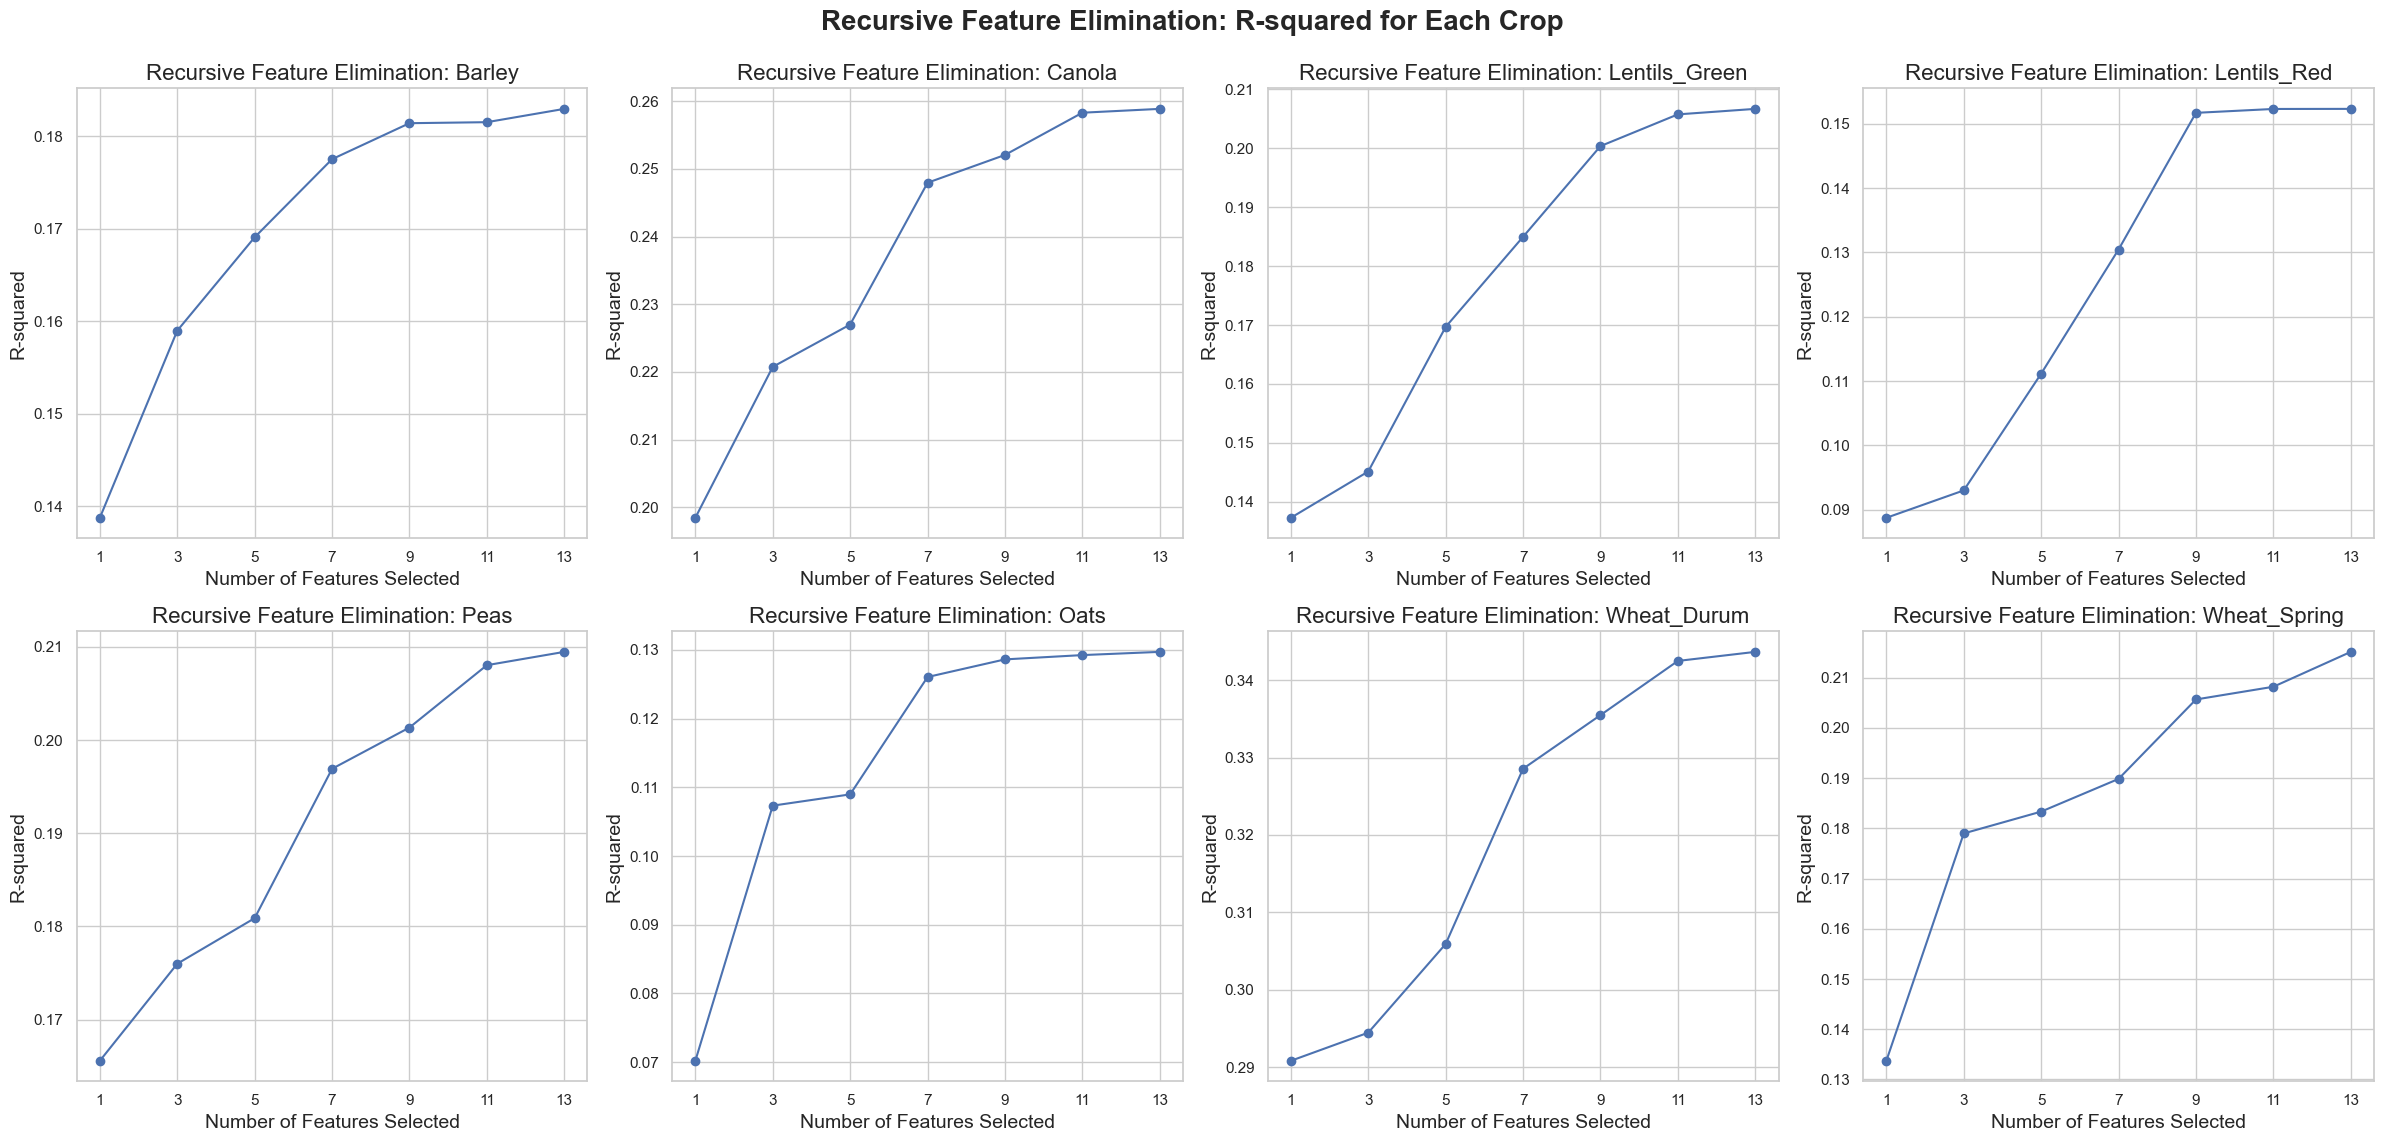

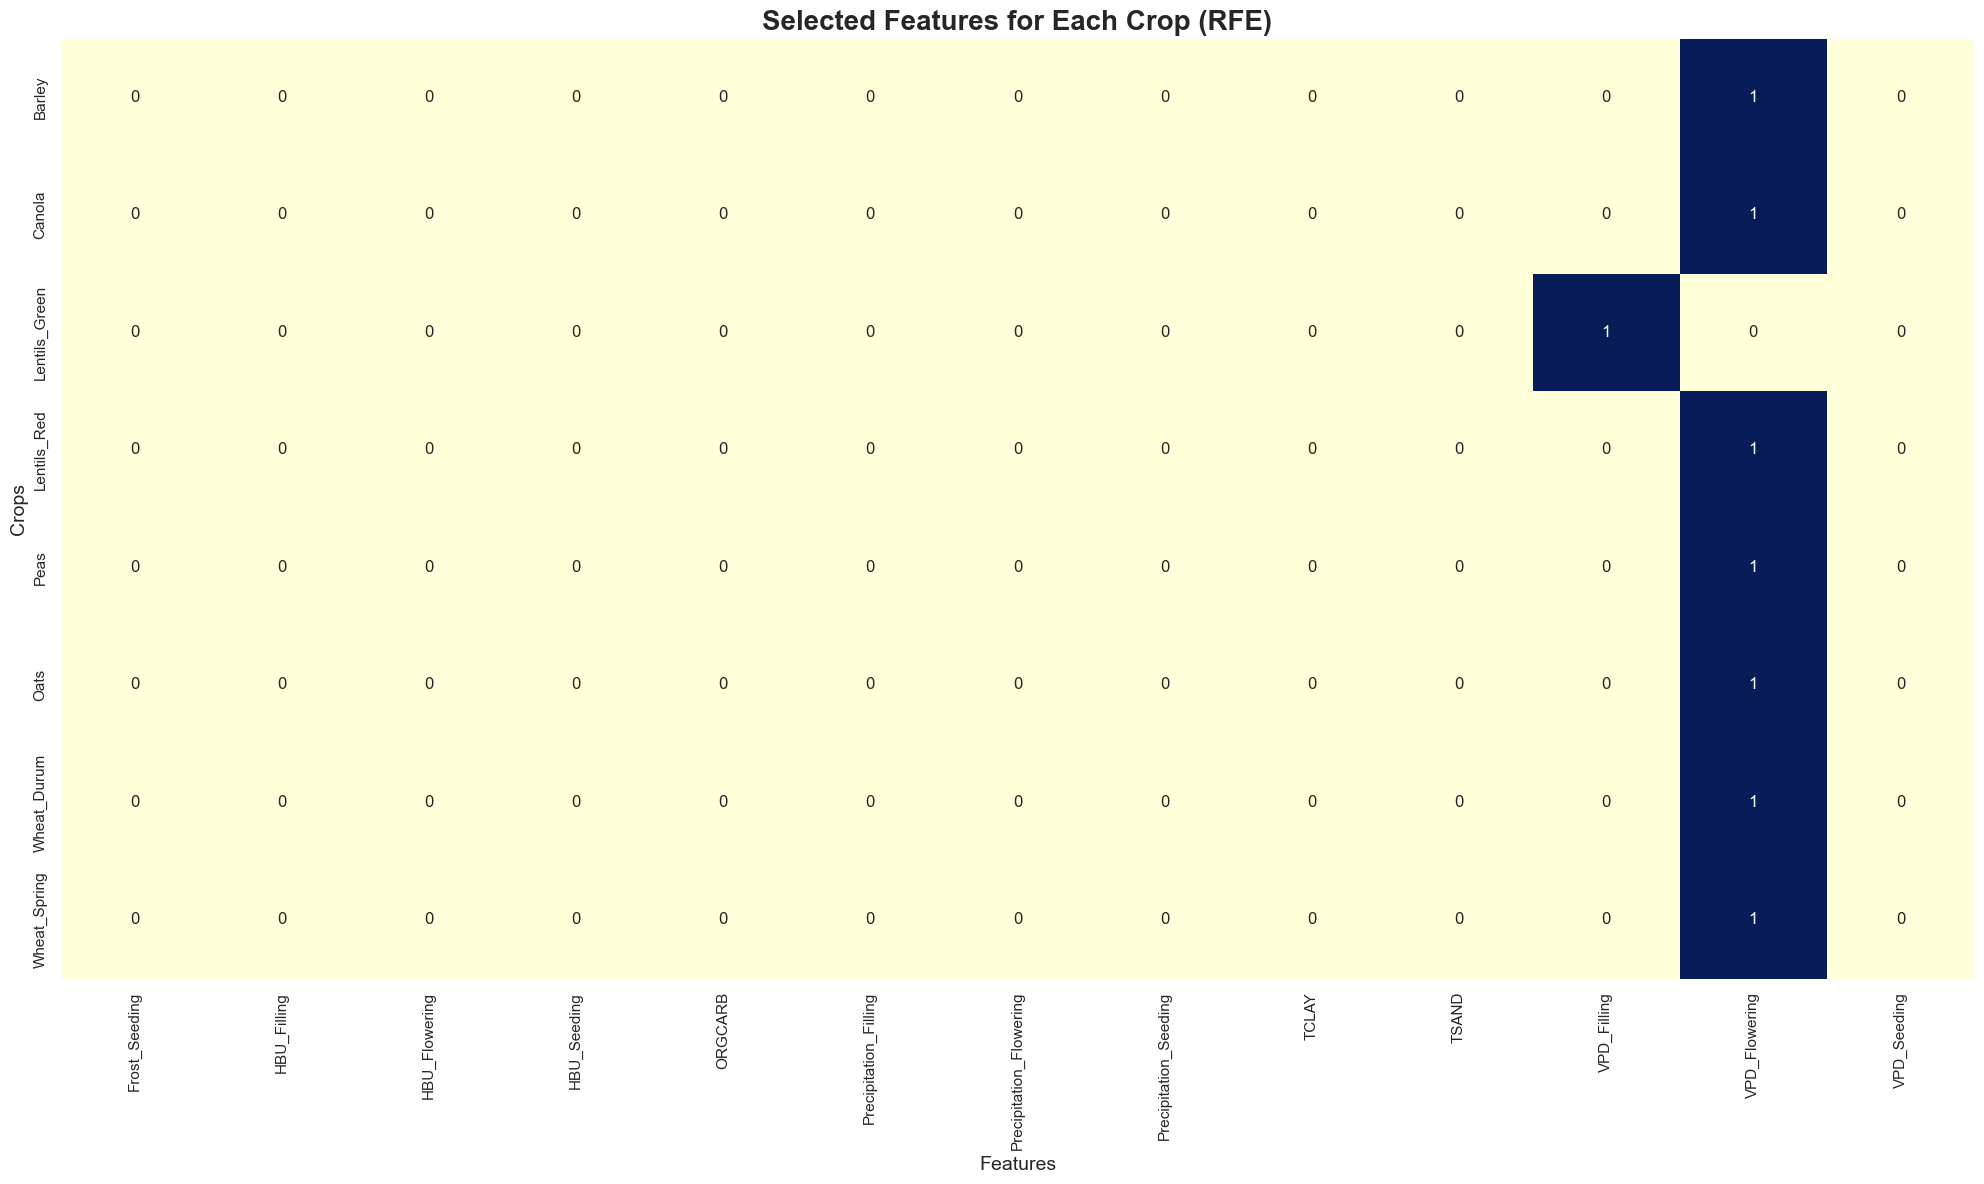

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

def recursive_feature_elimination(data, response):
    X = data.drop(columns=[response, 'LLD', 'Crop', 'Township', 'SoilType', 'Year', 'PR'], errors='ignore')
    y = data[response]

    # Initialize linear regression model
    model = LinearRegression()

    # Perform RFE
    rfe = RFE(model, n_features_to_select=1)
    rfe.fit(X, y)

    # Get the ranking of features
    ranking = pd.Series(rfe.ranking_, index=X.columns)
    
    # Calculate R-squared values during the elimination process
    r_squared_history = []
    for i in range(1, len(X.columns) + 1):
        selected_features = X.columns[ranking <= i]
        model.fit(X[selected_features], y)
        r_squared_history.append(model.score(X[selected_features], y))

    return ranking, r_squared_history

selected_features = {}
r_squared_plot_data = {}

# Define the list of 8 crops
list_of_crops = [
    'Barley',
    'Canola',
    'Lentils_Green',
    'Lentils_Red',
    'Peas',
    'Oats',
    'Wheat_Durum',
    'Wheat_Spring'
]

# Create 'dfs' dictionary by splitting 'df' based on 'Crop' column
dfs = {crop: df[df['Crop'] == crop].copy() for crop in list_of_crops}

# Initialize subplots: 2 rows x 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

for idx, (crop, df_crop) in enumerate(dfs.items()):
    ax = axes[idx]

    # Check if there are enough samples for the crop
    if df_crop.shape[0] < 10:  # You can adjust this threshold
        ax.text(0.5, 0.5, f"Not enough samples for {crop}", horizontalalignment='center',
                verticalalignment='center', fontsize=14, color='red')
        ax.set_title(f'{crop} - Not enough data', fontsize=16)
        ax.axis('off')
        continue

    # Define features (X) and target (y)
    X = df_crop.drop(columns=['Yield', 'LLD', 'Crop', 'Township', 'SoilType', 'Year','PR'], errors='ignore')
    y = df_crop['Yield']
    
    # Split the data into training and test sets
    train_df, test_df = train_test_split(df_crop, test_size=0.2, random_state=42)

    # Perform RFE
    ranking, r_squared_history = recursive_feature_elimination(train_df, 'Yield')
    selected_features[crop] = ranking  # Store the ranking for the heatmap
    r_squared_plot_data[crop] = r_squared_history

    # Plot Adjusted R-squared vs Number of Features
    ax.plot(range(1, len(r_squared_history)+1, 2), r_squared_history[::2], marker='o', linestyle='-')  # Use odd numbers for x-ticks
    ax.set_title(f'Recursive Feature Elimination: {crop}', fontsize=16)
    ax.set_xlabel('Number of Features Selected', fontsize=14)
    ax.set_ylabel('R-squared', fontsize=14)
    ax.set_xticks(range(1, len(r_squared_history)+1, 2))  # Only odd x-ticks to avoid overlay
    ax.grid(True)

# Remove any empty subplots if there are fewer than 8 crops
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Recursive Feature Elimination: R-squared for Each Crop', fontsize=20, fontweight='bold')
plt.show()

# Create a Heatmap for Selected Features
# Gather all unique selected features
all_selected_features = set()
for features in selected_features.values():
    all_selected_features.update(features.index)

# Create DataFrame with crops as rows and features as columns
feature_list = sorted(all_selected_features)
heatmap_data = pd.DataFrame(0, index=list_of_crops, columns=feature_list)

for crop, ranking in selected_features.items():
    for feature, rank in ranking.items():
        heatmap_data.loc[crop, feature] = 1 if rank == 1 else 0  # Mark selected features with 1

# Plot Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Selected Features for Each Crop (RFE)', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Crops', fontsize=14)
plt.tight_layout()
plt.show()

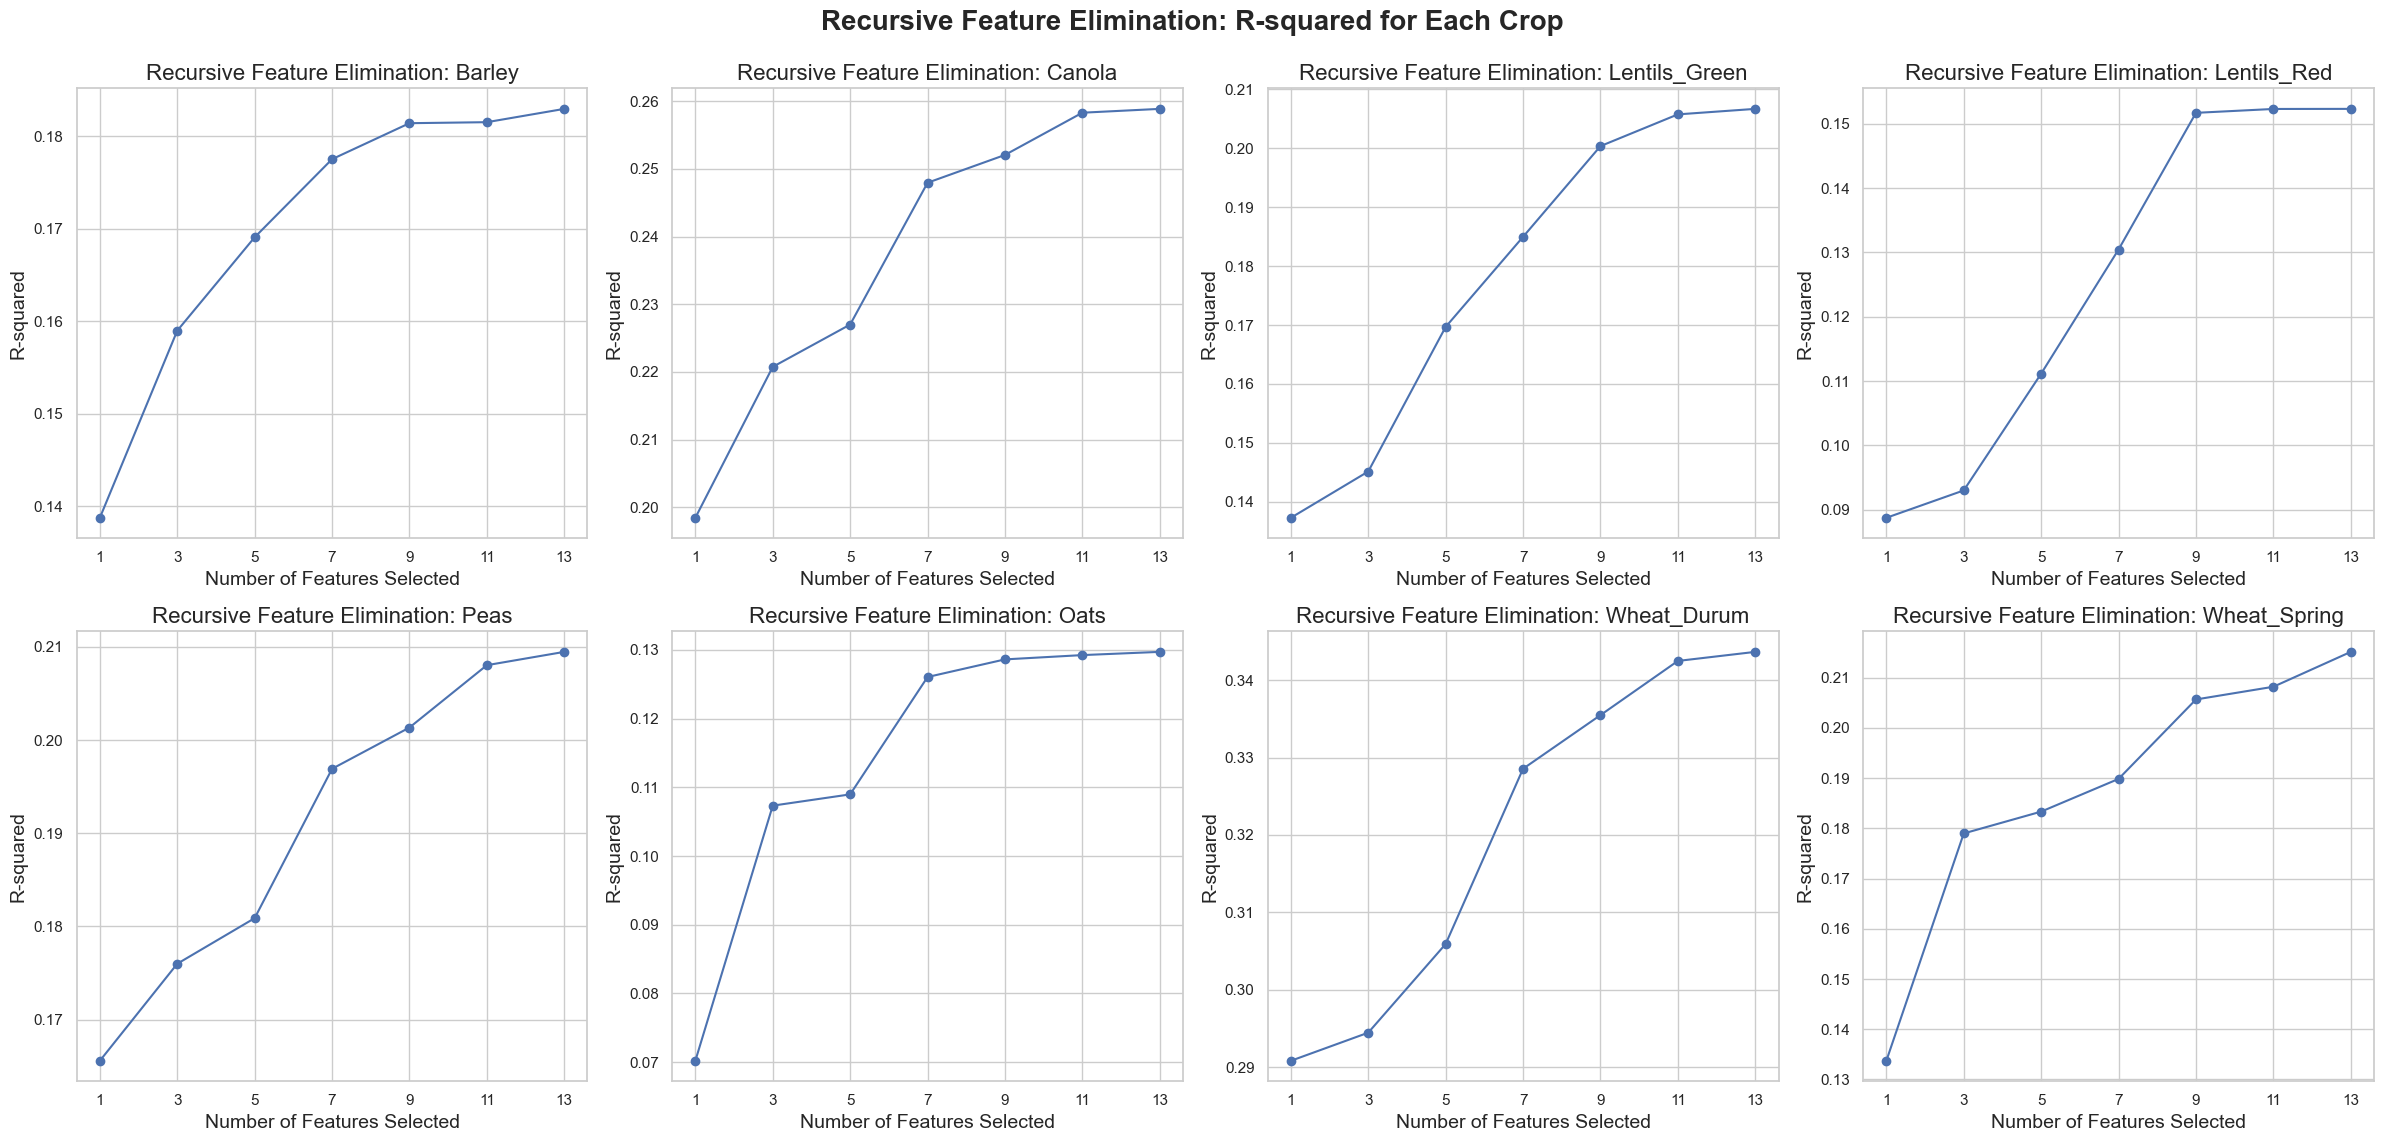

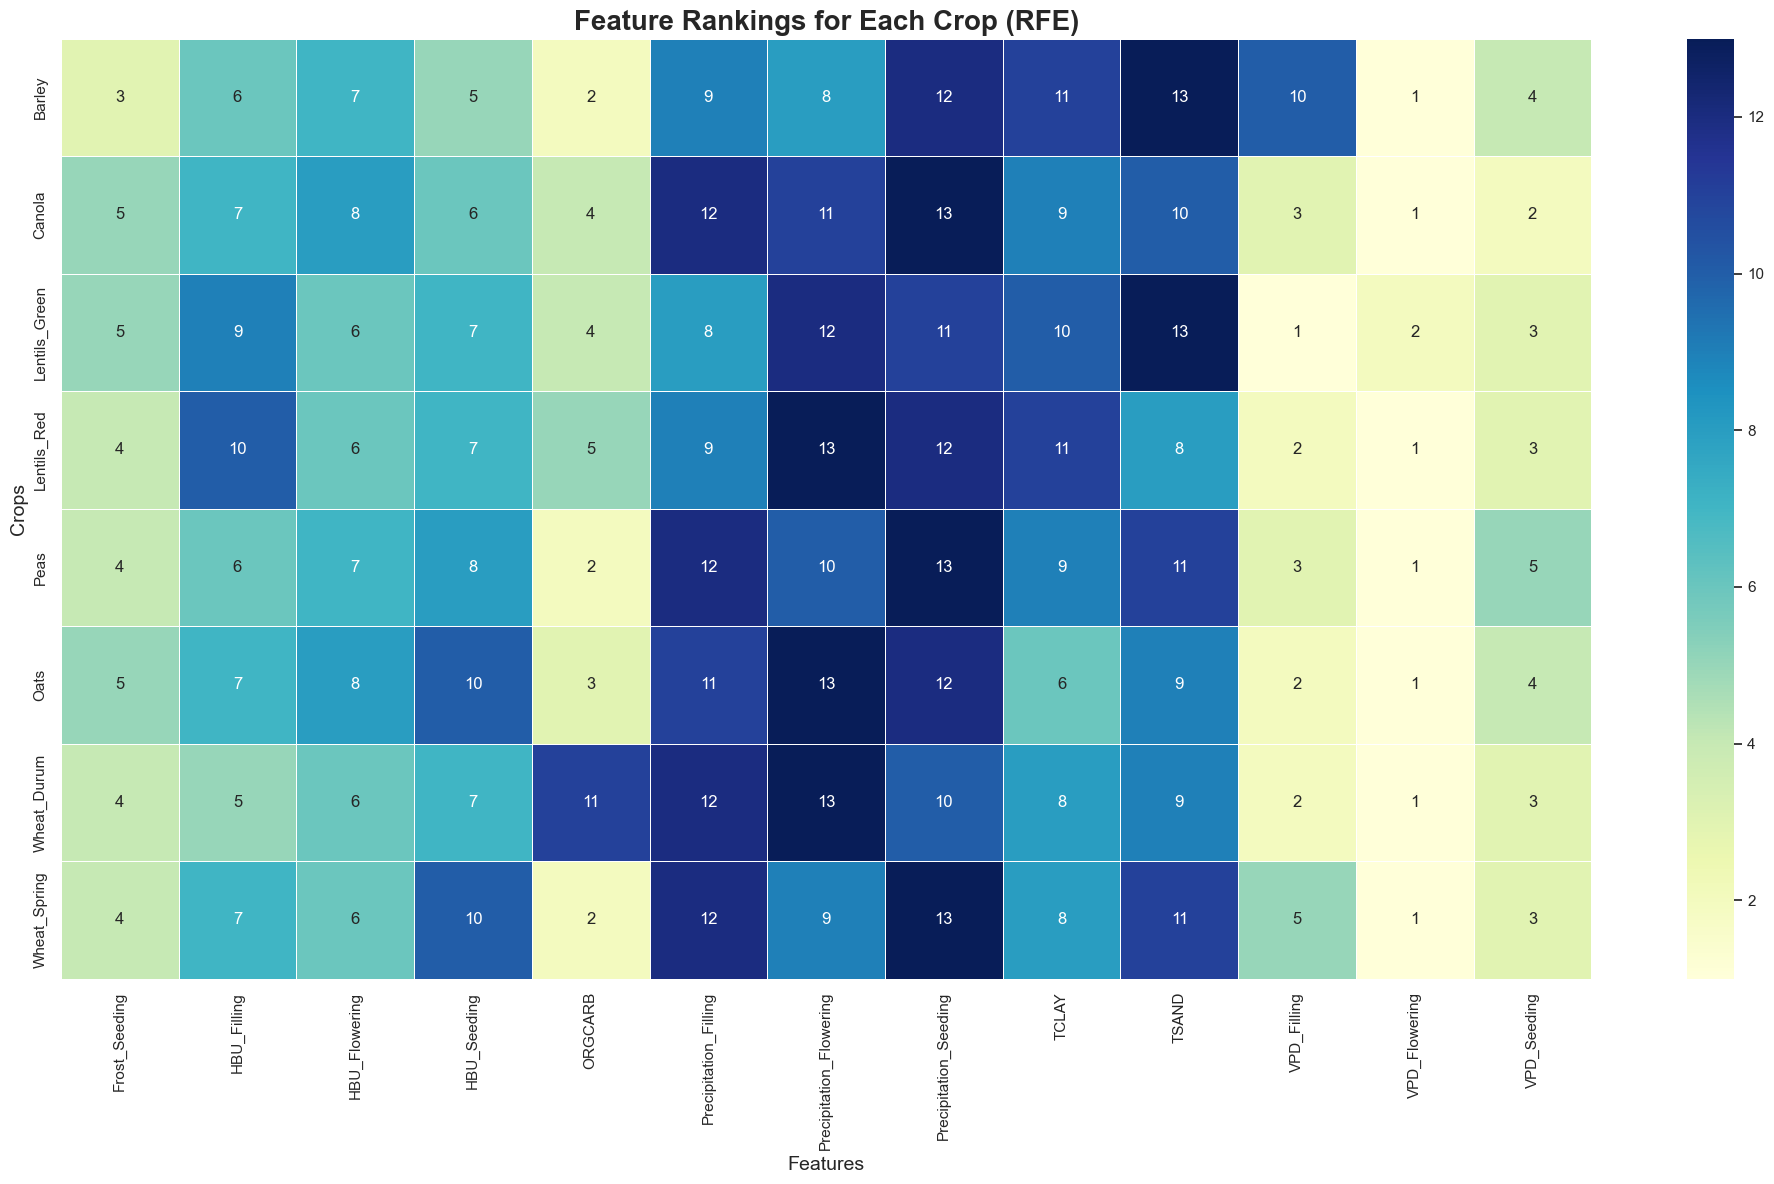

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

def recursive_feature_elimination(data, response):
    X = data.drop(columns=[response, 'LLD', 'Crop', 'Township', 'SoilType', 'Year','PR'], errors='ignore')
    y = data[response]

    # Initialize linear regression model
    model = LinearRegression()

    # Perform RFE
    rfe = RFE(model, n_features_to_select=1)
    rfe.fit(X, y)

    # Get the ranking of features
    ranking = pd.Series(rfe.ranking_, index=X.columns)
    
    # Calculate R-squared values during the elimination process
    r_squared_history = []
    for i in range(1, len(X.columns) + 1):
        selected_features = X.columns[ranking <= i]
        model.fit(X[selected_features], y)
        r_squared_history.append(model.score(X[selected_features], y))

    return ranking, r_squared_history

selected_features = {}
r_squared_plot_data = {}

# Define the list of 8 crops
list_of_crops = [
    'Barley',
    'Canola',
    'Lentils_Green',
    'Lentils_Red',
    'Peas',
    'Oats',
    'Wheat_Durum',
    'Wheat_Spring'
]

# Create 'dfs' dictionary by splitting 'df' based on 'Crop' column
dfs = {crop: df[df['Crop'] == crop].copy() for crop in list_of_crops}

# Initialize subplots: 2 rows x 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

for idx, (crop, df_crop) in enumerate(dfs.items()):
    ax = axes[idx]

    # Check if there are enough samples for the crop
    if df_crop.shape[0] < 10:  # You can adjust this threshold
        ax.text(0.5, 0.5, f"Not enough samples for {crop}", horizontalalignment='center',
                verticalalignment='center', fontsize=14, color='red')
        ax.set_title(f'{crop} - Not enough data', fontsize=16)
        ax.axis('off')
        continue

    # Define features (X) and target (y)
    X = df_crop.drop(columns=['Yield', 'LLD', 'Crop', 'Township', 'SoilType', 'Year','PR'], errors='ignore')
    y = df_crop['Yield']
    
    # Split the data into training and test sets
    train_df, test_df = train_test_split(df_crop, test_size=0.2, random_state=42)

    # Perform RFE
    ranking, r_squared_history = recursive_feature_elimination(train_df, 'Yield')
    selected_features[crop] = ranking  # Store the ranking for the heatmap
    r_squared_plot_data[crop] = r_squared_history

    # Plot Adjusted R-squared vs Number of Features
    ax.plot(range(1, len(r_squared_history)+1, 2), r_squared_history[::2], marker='o', linestyle='-')  # Use odd numbers for x-ticks
    ax.set_title(f'Recursive Feature Elimination: {crop}', fontsize=16)
    ax.set_xlabel('Number of Features Selected', fontsize=14)
    ax.set_ylabel('R-squared', fontsize=14)
    ax.set_xticks(range(1, len(r_squared_history)+1, 2))  # Only odd x-ticks to avoid overlay
    ax.grid(True)

# Remove any empty subplots if there are fewer than 8 crops
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Recursive Feature Elimination: R-squared for Each Crop', fontsize=20, fontweight='bold')
plt.show()

# Create a Heatmap for Selected Features (Ranked)
# Gather all unique selected features
all_selected_features = set()
for features in selected_features.values():
    all_selected_features.update(features.index)

# Create DataFrame with crops as rows and features as columns
feature_list = sorted(all_selected_features)
heatmap_data = pd.DataFrame(np.nan, index=list_of_crops, columns=feature_list)

for crop, ranking in selected_features.items():
    for feature, rank in ranking.items():
        heatmap_data.loc[crop, feature] = rank  # Use actual ranking in heatmap

# Plot Heatmap with rankings
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Feature Rankings for Each Crop (RFE)', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Crops', fontsize=14)
plt.tight_layout()
plt.show()

# Feature Preprocessing

In [70]:
df

,Township,Crop,Year,Yield,Precipitation_Seeding,VPD_Seeding,HBU_Seeding,Frost_Seeding,Precipitation_Flowering,VPD_Flowering,HBU_Flowering,Precipitation_Filling,VPD_Filling,HBU_Filling,TSAND,TCLAY,ORGCARB
0,1-1-E1,Canola,2015,48.67,168.20999,1.369346,0.311188,-4.689880,133.660000,1.553696,22.291290,26.460001,1.862087,54.210480,21.207698,41.549242,5.313211
1,1-1-E1,Canola,2016,20.20,209.40000,1.450707,5.243256,0.000000,122.689995,1.378214,21.949005,108.310000,1.511178,11.462708,21.207698,41.549242,5.313211
2,1-1-E1,Canola,2018,52.00,182.50000,1.802501,25.105500,0.000000,24.930000,1.908551,44.355804,11.210000,2.249942,54.986206,21.207698,41.549242,5.313211
3,1-1-E1,Canola,2019,47.25,91.86000,2.082648,38.482086,0.000000,106.400000,1.797172,36.622680,64.520004,1.720033,17.779907,21.207698,41.549242,5.313211
4,1-1-E1,Peas,2016,12.00,202.66000,1.457470,5.243256,0.000000,119.979996,1.333913,18.909820,97.590000,1.515193,10.640564,21.207698,41.549242,5.313211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41344,96-20-W5,Canola,2020,54.00,120.71000,1.015522,0.000000,-7.587738,105.720000,1.188826,0.000000,76.970000,1.301826,3.718048,34.278055,34.193910,4.357281
41345,96-20-W5,Canola,2021,60.00,62.26000,1.620388,6.688232,-1.190338,39.070000,2.116767,67.614655,48.940000,1.616508,12.607025,34.278055,34.193910,4.357281
41346,96-20-W5,Oats,2016,192.74,74.87000,1.567566,3.437317,-0.848999,95.990000,1.333866,0.000000,75.420000,1.525710,0.000000,34.278055,34.193910,4.357281
41347,96-20-W5,Peas,2017,35.21,67.27000,1.507543,0.647003,0.000000,45.690000,1.568752,0.000000,45.180000,1.588463,1.753326,34.278055,34.193910,4.357281


In [71]:
print(df.columns.tolist())


['Township', 'Crop', 'Year', 'Yield', 'Precipitation_Seeding', 'VPD_Seeding', 'HBU_Seeding', 'Frost_Seeding', 'Precipitation_Flowering', 'VPD_Flowering', 'HBU_Flowering', 'Precipitation_Filling', 'VPD_Filling', 'HBU_Filling', 'TSAND', 'TCLAY', 'ORGCARB']


In [79]:
import os
import logging
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# -----------------------------------------------------------
# Configure Directories for Processed Data and Logs
# -----------------------------------------------------------
processed_dir = "/Users/dulminiguruge/Documents/GitHub/syn-yields/2025/aug-31/data/processed/"
scalers_dir  = os.path.join(processed_dir, "scalers/")
logs_dir     = "/Users/dulminiguruge/Documents/GitHub/syn-yields/2025/aug-31/outputs/logs/"

for d in (processed_dir, scalers_dir, logs_dir):
    os.makedirs(d, exist_ok=True)

# -----------------------------------------------------------
# Configure Logging: File Only (No Console Output)
# -----------------------------------------------------------
logger = logging.getLogger()
logger.setLevel(logging.INFO)
for handler in logger.handlers[:]:
    logger.removeHandler(handler)

log_file_path = os.path.join(logs_dir, f"feature-preprocessing-splitting-{version}.log")
file_handler  = logging.FileHandler(log_file_path, mode="w")
file_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
logger.addHandler(file_handler)

logging.info("Logging configured. Log file: %s", log_file_path)

# -----------------------------------------------------------
# Define Per-Crop Scaling & Splitting Function
# -----------------------------------------------------------
def scale_split_and_pickle(df, features_to_keep, features_to_scale,
                           test_size=0.20, random_state=42):
    logging.info("Starting per-crop sklearn MinMax scaling & splitting.")
    
    # Keep only needed columns
    df = df[features_to_keep].copy()
    train_parts, test_parts = [], []
    
    # For each crop, split then fit/transform with its own MinMaxScaler
    for crop, subdf in df.groupby("Crop"):
        logging.info("Crop '%s': total rows=%d", crop, len(subdf))
        
        # train/test split
        train_df, test_df = train_test_split(
            subdf, test_size=test_size,
            random_state=random_state, shuffle=True
        )
        logging.info(" → train=%d / test=%d", len(train_df), len(test_df))
        
        # fit scaler on train
        scaler = MinMaxScaler()
        scaler.fit(train_df[features_to_scale])
        logging.info(" → fitted MinMaxScaler for '%s'", crop)
        
        # transform both sets
        train_df.loc[:, features_to_scale] = scaler.transform(train_df[features_to_scale])
        test_df.loc[:,  features_to_scale] = scaler.transform(test_df[features_to_scale])
        
        # collect
        train_parts.append(train_df)
        test_parts.append(test_df)
        
        # pickle the fitted scaler
        scaler_path = os.path.join(
            scalers_dir,
            f"minmax_scaler_{crop.replace(' ', '_')}_{version}.pkl"
        )
        with open(scaler_path, "wb") as f:
            pickle.dump(scaler, f)
        logging.info(" → saved scaler for '%s' to %s", crop, scaler_path)
    
    # concatenate all crops
    train_scaled = pd.concat(train_parts, ignore_index=True)
    test_scaled  = pd.concat(test_parts,  ignore_index=True)
    logging.info("All crops processed: train shape=%s, test shape=%s",
                 train_scaled.shape, test_scaled.shape)
    
    return train_scaled, test_scaled

# -----------------------------------------------------------
# Features & Version (ensure `version` is defined)
# -----------------------------------------------------------
#Added HBU_Seeding
features_to_keep = [
    'Township', 'Year', 'Crop', 'Yield',
    'Precipitation_Seeding', 'VPD_Seeding',  'HBU_Seeding', 'Frost_Seeding',
    'Precipitation_Flowering','VPD_Flowering','HBU_Flowering',
    'Precipitation_Filling',  'VPD_Filling',  'HBU_Filling', 
    'TSAND', 'TCLAY', 'ORGCARB'
]
features_to_scale = [
    'Precipitation_Seeding', 'VPD_Seeding', 'HBU_Seeding', 'Frost_Seeding',
    'Precipitation_Flowering','VPD_Flowering','HBU_Flowering',
    'Precipitation_Filling', 'VPD_Filling', 'HBU_Filling', 
    'TSAND', 'TCLAY', 'ORGCARB'
]

# e.g.: version = "v1"
# Make sure you define `version` earlier in your script!

# -----------------------------------------------------------
# Run Processing & Save CSVs
# -----------------------------------------------------------
train_scaled, test_scaled = scale_split_and_pickle(
    df, features_to_keep, features_to_scale
)

train_csv = os.path.join(
    processed_dir, f"train_scaled_80_11_24_{version}.csv"
)
test_csv  = os.path.join(
    processed_dir, f"test_scaled_20_11_24_{version}.csv"
)

train_scaled.to_csv(train_csv, index=False)
logging.info("Saved scaled training data to %s", train_csv)

test_scaled.to_csv(test_csv, index=False)
logging.info("Saved scaled test data to %s", test_csv)


In [80]:
df_climate_agg.columns

Index(['Township', 'Year', 'Crop', 'Precipitation_Seeding', 'VPD_Seeding',
       'HBU_Seeding', 'Frost_Seeding', 'Precipitation_Flowering',
       'VPD_Flowering', 'HBU_Flowering', 'Precipitation_Filling',
       'VPD_Filling', 'HBU_Filling'],
      dtype='object')

In [81]:
df_climate_agg = df_climate_agg[['Township', 'Year', 'Crop', 
        'Precipitation_Seeding', 'VPD_Seeding', 'HBU_Seeding','Frost_Seeding',
         'Precipitation_Flowering',  'VPD_Flowering', 'HBU_Flowering',
        'Precipitation_Filling', 'VPD_Filling','HBU_Filling']]

In [76]:
df_climate_agg.columns

Index(['Township', 'Year', 'Crop', 'Precipitation_Seeding', 'VPD_Seeding',
       'HBU_Seeding', 'Frost_Seeding', 'Precipitation_Flowering',
       'VPD_Flowering', 'HBU_Flowering', 'Precipitation_Filling',
       'VPD_Filling', 'HBU_Filling'],
      dtype='object')

In [77]:
df_climate_agg.to_csv(f'/Users/dulminiguruge/Documents/GitHub/syn-yields/2025/aug-31/data/processed/climate_agg_by_seeding_date_11_24_{version}.csv', index=False)

In [78]:
# Count NaNs per column
print(df_climate_agg.isna().sum())

Township                   0
Year                       0
Crop                       0
Precipitation_Seeding      0
VPD_Seeding                0
HBU_Seeding                0
Frost_Seeding              0
Precipitation_Flowering    0
VPD_Flowering              0
HBU_Flowering              0
Precipitation_Filling      0
VPD_Filling                0
HBU_Filling                0
dtype: int64
